Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

# Первая часть. Исследование

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [2]:
data = pd.read_csv('./train.csv')

In [3]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [4]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [5]:
data.shape

(5282, 20)

Проверим, есть ли пропуски в данных:

In [6]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [7]:
data[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ClientPeriod     5282 non-null   int64  
 1   MonthlySpending  5282 non-null   float64
 2   TotalSpent       5282 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 123.9+ KB


Мы видим, что у признака TotalSpent тип данных object, хотя заявлено, что это числовой признак.

In [8]:
data[pd.to_numeric(data.TotalSpent, errors='coerce').isnull()]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


Мы видим, что у этих объектов в колонке TotalSpent пустые строки. Заменим их на нули.

In [9]:
data.TotalSpent.replace(" ", 0, inplace = True)

Теперь приведем все к float.

In [10]:
data.TotalSpent=data.TotalSpent.astype('float')

In [11]:
data.TotalSpent

0       1026.35
1       1872.20
2         75.90
3       2570.00
4       6758.45
         ...   
5277      82.15
5278    2188.45
5279      55.05
5280    2215.25
5281    1375.60
Name: TotalSpent, Length: 5282, dtype: float64

## Анализ данных

Посмотрим на распределение численных признаков:

In [12]:
df_num = data.loc[:, num_cols]

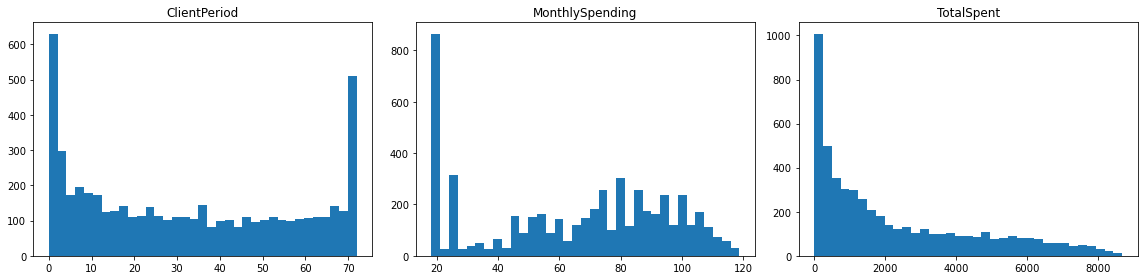

In [13]:
fig,axes = plt.subplots(figsize=(16,4), nrows=1, ncols=3);
axes = axes.ravel()
for idx, col in enumerate(num_cols):
    axes[idx].hist(data.loc[:, col], bins=35)
    axes[idx].set_title(col)
plt.tight_layout()

Видим, что у компании много как новых, но быстро уходящих клиентов, так и лояльных клиентов. В целом, судя по гистограммам MonthlySpending и TotalSpent, мы получили правдободобные закономерности, большая категория клиентов пользуется недорогими тарифами, и, поскольку отток клиентов довольно большой, максимум значений TotalSpent находится в промежутке до 1000 ден.единиц.

Теперь посчитаем количество значений в категориальных колонках:

In [14]:
df_cat = data[cat_cols]

In [15]:
for col in df_cat.columns:
    print(df_cat[col].value_counts())
    print('_____________________________________________')

Male      2655
Female    2627
Name: Sex, dtype: int64
_____________________________________________
0    4440
1     842
Name: IsSeniorCitizen, dtype: int64
_____________________________________________
No     2705
Yes    2577
Name: HasPartner, dtype: int64
_____________________________________________
No     3676
Yes    1606
Name: HasChild, dtype: int64
_____________________________________________
Yes    4761
No      521
Name: HasPhoneService, dtype: int64
_____________________________________________
No                  2511
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64
_____________________________________________
Fiber optic    2341
DSL            1800
No             1141
Name: HasInternetService, dtype: int64
_____________________________________________
No                     2612
Yes                    1529
No internet service    1141
Name: HasOnlineSecurityService, dtype: int64
_____________________________________________
No     

Построим barplot для категориалных признаков:

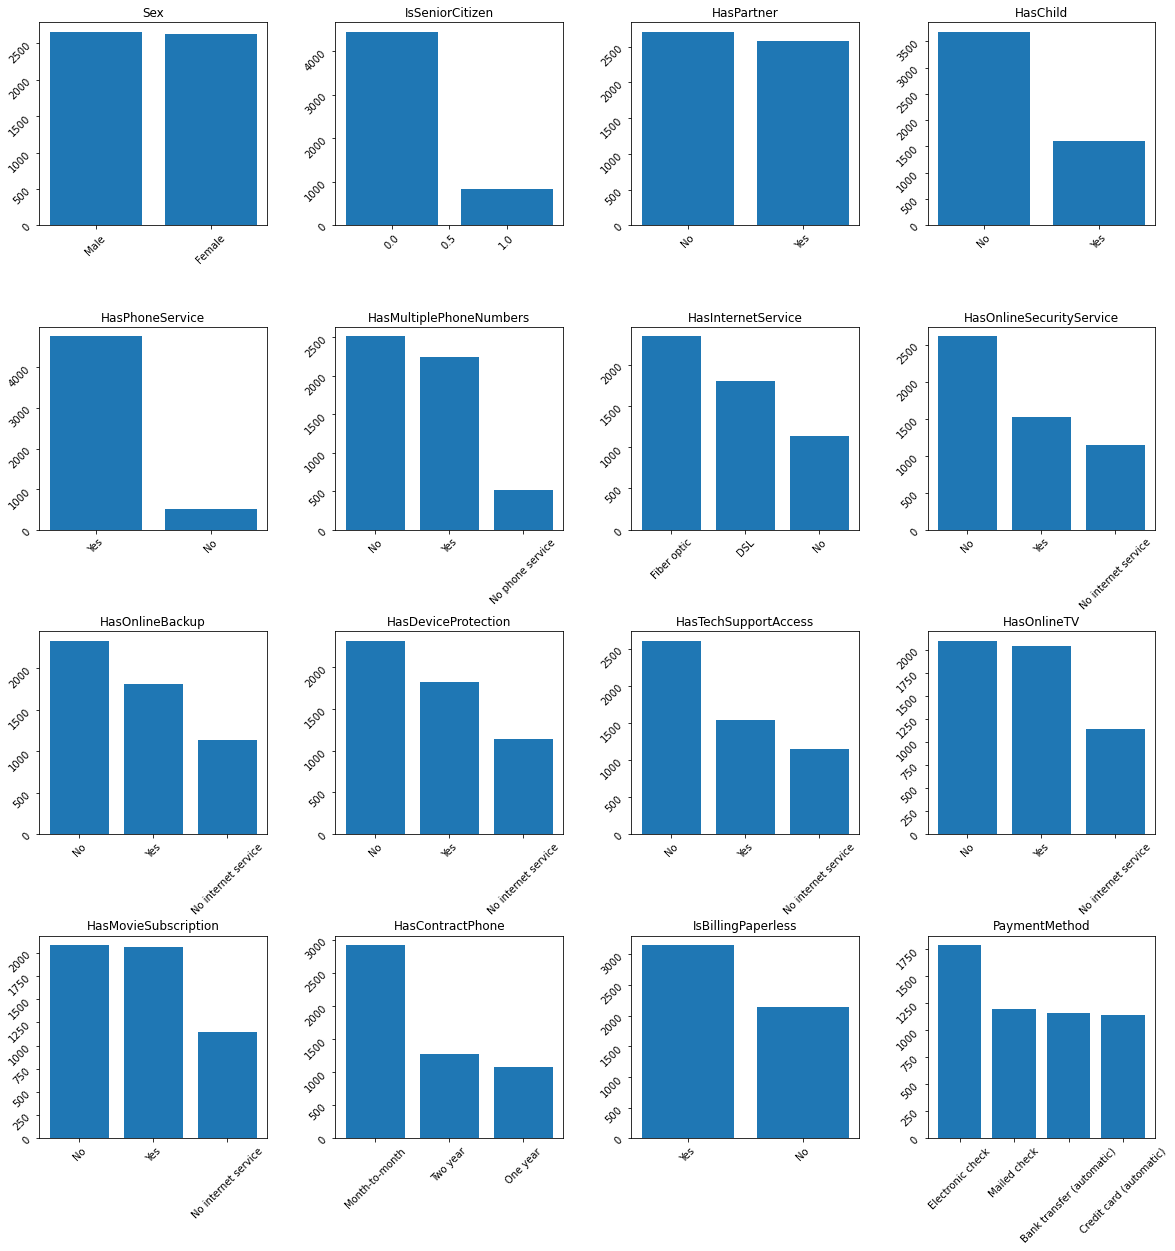

In [16]:
fig, ax = plt.subplots(figsize = (20, 20), nrows=4, ncols=4);
axis=ax.flatten()
for i, col in enumerate(df_cat.columns):
    bar_y = df_cat.loc[:, col].value_counts()
    bar_x = bar_y.index
    axis[i].bar(bar_x, bar_y)
    axis[i].set_title(col)
    axis[i].tick_params(labelrotation=45, labelsize = 10) #поворот надписей

plt.subplots_adjust(top=0.9, wspace=0.3, hspace=0.5) #расстояние между графиками

Теперь посмотрим на баланс классов:

In [17]:
data.Churn.value_counts(normalize=True)

0    0.737978
1    0.262022
Name: Churn, dtype: float64

Есть заметный дисбаланс классов.

## Применение линейных моделей

In [30]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score

Отнормируем числовые признаки и закодируем категориальные:

In [31]:
# YOUR CODE
scaler = StandardScaler()
num_scaled=scaler.fit_transform(df_num.values)
df_num_scaled = pd.DataFrame(num_scaled, columns = df_num.columns)

In [32]:
df_cat_scaled = pd.get_dummies(df_cat)

Создадим новый датасет, с обработанными данными, который будем в дальнейшем использовать для обучения:

In [33]:
X = pd.concat([df_num_scaled, df_cat_scaled], axis=1)
y = data.Churn
X.head()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.920767,-1.505447,-0.555852,0,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
1,1.613288,-1.294998,-0.183039,0,0,1,0,1,1,0,...,0,0,0,1,1,0,0,1,0,0
2,-1.279005,0.363737,-0.974768,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3,-0.016173,0.476418,0.124519,1,1,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,1
4,1.124450,1.667856,1.970599,0,1,0,0,1,0,1,...,1,0,0,1,1,0,0,1,0,0


Для логистической регрессии с помощью кроссвалидации найдем лучшее значение гиперпараметра C - степени регуляризации весов:

In [34]:
c_vals = np.array([10**num for num in range(-3, 3)])

In [35]:
cv_model = GridSearchCV(estimator = LogisticRegression(), param_grid = {'C':c_vals}, cv=5, scoring = 'roc_auc', refit=True)
cv_model.fit(X, y)
cv_model.best_params_

D:\myPrograms\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\myPrograms\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_re

{'C': 100.0}

Лучшее качество (усредненное на 5 фолдах) будет для C=100.0.

In [36]:
cv_model.best_score_

0.8451111355319523

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [25]:
import catboost

Разделим выборку на train/test. Поскольку численные признаки для моделей, основанных на деревьях, нормировать не нужно, а категориальные CatBoost обрабатывает сама, возьмем исходные неприведенные данные:

In [26]:
X_origin = data.drop(['Churn'], axis=1)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_origin, y, train_size=0.8)

Опробуем CatBoost-модель с стандартными параметрами:

In [28]:
boosting_model = catboost.CatBoostClassifier(cat_features = cat_cols)
boosting_model.fit(X_train, y_train)

y_train_pred = boosting_model.predict(X_train)
y_test_pred = boosting_model.predict(X_test)

Learning rate set to 0.019062
0:	learn: 0.6799813	total: 230ms	remaining: 3m 49s
1:	learn: 0.6683758	total: 264ms	remaining: 2m 11s
2:	learn: 0.6572955	total: 308ms	remaining: 1m 42s
3:	learn: 0.6486433	total: 324ms	remaining: 1m 20s
4:	learn: 0.6384256	total: 361ms	remaining: 1m 11s
5:	learn: 0.6294532	total: 398ms	remaining: 1m 5s
6:	learn: 0.6192647	total: 450ms	remaining: 1m 3s
7:	learn: 0.6096650	total: 492ms	remaining: 1m
8:	learn: 0.6004326	total: 537ms	remaining: 59.2s
9:	learn: 0.5914508	total: 599ms	remaining: 59.3s
10:	learn: 0.5827788	total: 634ms	remaining: 57s
11:	learn: 0.5751089	total: 673ms	remaining: 55.4s
12:	learn: 0.5675614	total: 719ms	remaining: 54.6s
13:	learn: 0.5608842	total: 766ms	remaining: 53.9s
14:	learn: 0.5537276	total: 811ms	remaining: 53.2s
15:	learn: 0.5469920	total: 864ms	remaining: 53.1s
16:	learn: 0.5412864	total: 930ms	remaining: 53.8s
17:	learn: 0.5353874	total: 974ms	remaining: 53.1s
18:	learn: 0.5296114	total: 1.03s	remaining: 53.1s
19:	learn: 

164:	learn: 0.3902465	total: 7.94s	remaining: 40.2s
165:	learn: 0.3901366	total: 7.99s	remaining: 40.1s
166:	learn: 0.3899691	total: 8.05s	remaining: 40.1s
167:	learn: 0.3897653	total: 8.09s	remaining: 40.1s
168:	learn: 0.3896963	total: 8.14s	remaining: 40s
169:	learn: 0.3896367	total: 8.19s	remaining: 40s
170:	learn: 0.3894955	total: 8.25s	remaining: 40s
171:	learn: 0.3893168	total: 8.3s	remaining: 40s
172:	learn: 0.3892430	total: 8.36s	remaining: 40s
173:	learn: 0.3891878	total: 8.39s	remaining: 39.8s
174:	learn: 0.3891062	total: 8.43s	remaining: 39.7s
175:	learn: 0.3890238	total: 8.54s	remaining: 40s
176:	learn: 0.3888108	total: 8.59s	remaining: 39.9s
177:	learn: 0.3886947	total: 8.62s	remaining: 39.8s
178:	learn: 0.3886422	total: 8.67s	remaining: 39.8s
179:	learn: 0.3884757	total: 8.71s	remaining: 39.7s
180:	learn: 0.3883280	total: 8.76s	remaining: 39.6s
181:	learn: 0.3880907	total: 8.82s	remaining: 39.6s
182:	learn: 0.3878372	total: 8.88s	remaining: 39.6s
183:	learn: 0.3878364	tot

329:	learn: 0.3751543	total: 15.4s	remaining: 31.3s
330:	learn: 0.3749661	total: 15.4s	remaining: 31.2s
331:	learn: 0.3749580	total: 15.5s	remaining: 31.2s
332:	learn: 0.3749476	total: 15.5s	remaining: 31.1s
333:	learn: 0.3746593	total: 15.6s	remaining: 31s
334:	learn: 0.3744079	total: 15.6s	remaining: 31s
335:	learn: 0.3743763	total: 15.6s	remaining: 30.9s
336:	learn: 0.3742813	total: 15.7s	remaining: 30.9s
337:	learn: 0.3741607	total: 15.8s	remaining: 30.8s
338:	learn: 0.3741300	total: 15.8s	remaining: 30.8s
339:	learn: 0.3740411	total: 15.9s	remaining: 30.8s
340:	learn: 0.3738752	total: 15.9s	remaining: 30.8s
341:	learn: 0.3738685	total: 16s	remaining: 30.7s
342:	learn: 0.3737938	total: 16s	remaining: 30.7s
343:	learn: 0.3737938	total: 16.1s	remaining: 30.6s
344:	learn: 0.3737440	total: 16.1s	remaining: 30.6s
345:	learn: 0.3737432	total: 16.1s	remaining: 30.5s
346:	learn: 0.3737374	total: 16.2s	remaining: 30.4s
347:	learn: 0.3737261	total: 16.2s	remaining: 30.3s
348:	learn: 0.373697

490:	learn: 0.3603374	total: 23s	remaining: 23.9s
491:	learn: 0.3602322	total: 23.1s	remaining: 23.8s
492:	learn: 0.3600664	total: 23.1s	remaining: 23.8s
493:	learn: 0.3598383	total: 23.2s	remaining: 23.8s
494:	learn: 0.3596947	total: 23.2s	remaining: 23.7s
495:	learn: 0.3596495	total: 23.3s	remaining: 23.7s
496:	learn: 0.3595718	total: 23.4s	remaining: 23.6s
497:	learn: 0.3594605	total: 23.4s	remaining: 23.6s
498:	learn: 0.3593238	total: 23.5s	remaining: 23.6s
499:	learn: 0.3593186	total: 23.5s	remaining: 23.5s
500:	learn: 0.3591436	total: 23.6s	remaining: 23.5s
501:	learn: 0.3589611	total: 23.6s	remaining: 23.4s
502:	learn: 0.3587316	total: 23.7s	remaining: 23.4s
503:	learn: 0.3586073	total: 23.7s	remaining: 23.4s
504:	learn: 0.3585363	total: 23.8s	remaining: 23.3s
505:	learn: 0.3584658	total: 23.8s	remaining: 23.3s
506:	learn: 0.3584223	total: 23.9s	remaining: 23.2s
507:	learn: 0.3582619	total: 23.9s	remaining: 23.2s
508:	learn: 0.3581728	total: 24s	remaining: 23.1s
509:	learn: 0.35

649:	learn: 0.3455046	total: 31.2s	remaining: 16.8s
650:	learn: 0.3454210	total: 31.3s	remaining: 16.8s
651:	learn: 0.3453789	total: 31.3s	remaining: 16.7s
652:	learn: 0.3453682	total: 31.4s	remaining: 16.7s
653:	learn: 0.3452137	total: 31.4s	remaining: 16.6s
654:	learn: 0.3451184	total: 31.5s	remaining: 16.6s
655:	learn: 0.3450085	total: 31.5s	remaining: 16.5s
656:	learn: 0.3449876	total: 31.6s	remaining: 16.5s
657:	learn: 0.3449496	total: 31.6s	remaining: 16.4s
658:	learn: 0.3448871	total: 31.7s	remaining: 16.4s
659:	learn: 0.3448051	total: 31.7s	remaining: 16.3s
660:	learn: 0.3447197	total: 31.8s	remaining: 16.3s
661:	learn: 0.3447132	total: 31.8s	remaining: 16.2s
662:	learn: 0.3446700	total: 31.9s	remaining: 16.2s
663:	learn: 0.3446057	total: 31.9s	remaining: 16.2s
664:	learn: 0.3445505	total: 32s	remaining: 16.1s
665:	learn: 0.3444974	total: 32s	remaining: 16.1s
666:	learn: 0.3444750	total: 32.1s	remaining: 16s
667:	learn: 0.3444185	total: 32.1s	remaining: 16s
668:	learn: 0.344355

810:	learn: 0.3335256	total: 39.4s	remaining: 9.19s
811:	learn: 0.3335174	total: 39.5s	remaining: 9.14s
812:	learn: 0.3334118	total: 39.5s	remaining: 9.09s
813:	learn: 0.3332550	total: 39.6s	remaining: 9.04s
814:	learn: 0.3332281	total: 39.6s	remaining: 8.99s
815:	learn: 0.3331769	total: 39.6s	remaining: 8.94s
816:	learn: 0.3330370	total: 39.7s	remaining: 8.89s
817:	learn: 0.3330025	total: 39.7s	remaining: 8.84s
818:	learn: 0.3329783	total: 39.7s	remaining: 8.78s
819:	learn: 0.3329482	total: 39.8s	remaining: 8.73s
820:	learn: 0.3328991	total: 39.8s	remaining: 8.68s
821:	learn: 0.3328401	total: 39.9s	remaining: 8.63s
822:	learn: 0.3328188	total: 39.9s	remaining: 8.58s
823:	learn: 0.3327798	total: 39.9s	remaining: 8.53s
824:	learn: 0.3326575	total: 40s	remaining: 8.48s
825:	learn: 0.3325738	total: 40s	remaining: 8.43s
826:	learn: 0.3325626	total: 40.1s	remaining: 8.39s
827:	learn: 0.3325279	total: 40.1s	remaining: 8.34s
828:	learn: 0.3325187	total: 40.2s	remaining: 8.29s
829:	learn: 0.33

971:	learn: 0.3215346	total: 47.6s	remaining: 1.37s
972:	learn: 0.3214280	total: 47.7s	remaining: 1.32s
973:	learn: 0.3213568	total: 47.7s	remaining: 1.27s
974:	learn: 0.3212980	total: 47.8s	remaining: 1.23s
975:	learn: 0.3212517	total: 47.8s	remaining: 1.18s
976:	learn: 0.3211555	total: 47.9s	remaining: 1.13s
977:	learn: 0.3210971	total: 47.9s	remaining: 1.08s
978:	learn: 0.3210651	total: 48s	remaining: 1.03s
979:	learn: 0.3209503	total: 48s	remaining: 981ms
980:	learn: 0.3208594	total: 48.1s	remaining: 932ms
981:	learn: 0.3208235	total: 48.2s	remaining: 883ms
982:	learn: 0.3206804	total: 48.2s	remaining: 834ms
983:	learn: 0.3206175	total: 48.3s	remaining: 785ms
984:	learn: 0.3205413	total: 48.3s	remaining: 736ms
985:	learn: 0.3204073	total: 48.4s	remaining: 687ms
986:	learn: 0.3202958	total: 48.4s	remaining: 638ms
987:	learn: 0.3202708	total: 48.5s	remaining: 589ms
988:	learn: 0.3201748	total: 48.5s	remaining: 540ms
989:	learn: 0.3200903	total: 48.6s	remaining: 491ms
990:	learn: 0.32

Рассчитаем метрику на тренировочных и тестовых данных:

In [37]:
train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)
print(train_auc, test_auc)

0.7595251776028576 0.702465684937733


Теперь протестируем различные значения параметров n_estimators (количество деревьев) и learning_rate (скорость обучения):

In [38]:
boosting_model2 = catboost.CatBoostClassifier(cat_features=cat_cols,
                                             eval_metric='AUC')
boosting_model2.grid_search({'n_estimators': np.arange(10, 200, 10),
                           'learning_rate':np.arange(0.1, 0.5, 0.1)}, 
                           X_train, 
                           y_train, plot=True, refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.7643118	best: 0.7643118 (0)	total: 35.1ms	remaining: 316ms
1:	test: 0.7883441	best: 0.7883441 (1)	total: 58.1ms	remaining: 232ms
2:	test: 0.7944444	best: 0.7944444 (2)	total: 86.3ms	remaining: 201ms
3:	test: 0.7975484	best: 0.7975484 (3)	total: 108ms	remaining: 162ms
4:	test: 0.7973082	best: 0.7975484 (3)	total: 134ms	remaining: 134ms
5:	test: 0.7985376	best: 0.7985376 (5)	total: 166ms	remaining: 111ms
6:	test: 0.8039211	best: 0.8039211 (6)	total: 194ms	remaining: 83ms
7:	test: 0.8083763	best: 0.8083763 (7)	total: 215ms	remaining: 53.7ms
8:	test: 0.8124158	best: 0.8124158 (8)	total: 240ms	remaining: 26.7ms
9:	test: 0.8160394	best: 0.8160394 (9)	total: 258ms	remaining: 0us

bestTest = 0.8160394265
bestIteration = 9

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8160394	best: 0.8160394 (0)	total: 279ms	remaining: 21s
0:	test: 0.7643118	best: 0.7643118 (0)	total: 21.5ms	remaining:

2:	test: 0.8097419	best: 0.8097419 (2)	total: 119ms	remaining: 677ms
3:	test: 0.8149857	best: 0.8149857 (3)	total: 157ms	remaining: 627ms
4:	test: 0.8140824	best: 0.8149857 (3)	total: 193ms	remaining: 579ms
5:	test: 0.8183978	best: 0.8183978 (5)	total: 231ms	remaining: 539ms
6:	test: 0.8217634	best: 0.8217634 (6)	total: 273ms	remaining: 506ms
7:	test: 0.8261649	best: 0.8261649 (7)	total: 308ms	remaining: 462ms
8:	test: 0.8265878	best: 0.8265878 (8)	total: 339ms	remaining: 414ms
9:	test: 0.8274265	best: 0.8274265 (9)	total: 380ms	remaining: 380ms
10:	test: 0.8287312	best: 0.8287312 (10)	total: 418ms	remaining: 342ms
11:	test: 0.8309319	best: 0.8309319 (11)	total: 458ms	remaining: 305ms
12:	test: 0.8309319	best: 0.8309319 (11)	total: 481ms	remaining: 259ms
13:	test: 0.8309319	best: 0.8309319 (11)	total: 520ms	remaining: 223ms
14:	test: 0.8299427	best: 0.8309319 (11)	total: 566ms	remaining: 189ms
15:	test: 0.8293047	best: 0.8309319 (11)	total: 610ms	remaining: 153ms
16:	test: 0.8291971	be

2:	test: 0.8097419	best: 0.8097419 (2)	total: 118ms	remaining: 1.06s
3:	test: 0.8149857	best: 0.8149857 (3)	total: 156ms	remaining: 1.01s
4:	test: 0.8140824	best: 0.8149857 (3)	total: 198ms	remaining: 992ms
5:	test: 0.8183978	best: 0.8183978 (5)	total: 230ms	remaining: 919ms
6:	test: 0.8217634	best: 0.8217634 (6)	total: 273ms	remaining: 896ms
7:	test: 0.8261649	best: 0.8261649 (7)	total: 315ms	remaining: 867ms
8:	test: 0.8265878	best: 0.8265878 (8)	total: 344ms	remaining: 802ms
9:	test: 0.8274265	best: 0.8274265 (9)	total: 369ms	remaining: 739ms
10:	test: 0.8287312	best: 0.8287312 (10)	total: 395ms	remaining: 682ms
11:	test: 0.8309319	best: 0.8309319 (11)	total: 432ms	remaining: 648ms
12:	test: 0.8309319	best: 0.8309319 (11)	total: 452ms	remaining: 591ms
13:	test: 0.8309319	best: 0.8309319 (11)	total: 487ms	remaining: 557ms
14:	test: 0.8299427	best: 0.8309319 (11)	total: 524ms	remaining: 524ms
15:	test: 0.8293047	best: 0.8309319 (11)	total: 562ms	remaining: 491ms
16:	test: 0.8291971	be

5:	test: 0.8211971	best: 0.8211971 (5)	total: 208ms	remaining: 1.18s
6:	test: 0.8257061	best: 0.8257061 (6)	total: 242ms	remaining: 1.14s
7:	test: 0.8319140	best: 0.8319140 (7)	total: 283ms	remaining: 1.13s
8:	test: 0.8320860	best: 0.8320860 (8)	total: 320ms	remaining: 1.1s
9:	test: 0.8343728	best: 0.8343728 (9)	total: 356ms	remaining: 1.07s
10:	test: 0.8353978	best: 0.8353978 (10)	total: 386ms	remaining: 1.02s
11:	test: 0.8361828	best: 0.8361828 (11)	total: 425ms	remaining: 992ms
12:	test: 0.8356882	best: 0.8361828 (11)	total: 445ms	remaining: 925ms
13:	test: 0.8393369	best: 0.8393369 (13)	total: 482ms	remaining: 895ms
14:	test: 0.8396237	best: 0.8396237 (14)	total: 530ms	remaining: 883ms
15:	test: 0.8413118	best: 0.8413118 (15)	total: 568ms	remaining: 851ms
16:	test: 0.8421362	best: 0.8421362 (16)	total: 603ms	remaining: 815ms
17:	test: 0.8420108	best: 0.8421362 (16)	total: 644ms	remaining: 787ms
18:	test: 0.8422330	best: 0.8422330 (18)	total: 682ms	remaining: 754ms
19:	test: 0.84209

38:	test: 0.8373584	best: 0.8373584 (38)	total: 1.36s	remaining: 385ms
39:	test: 0.8372509	best: 0.8373584 (38)	total: 1.4s	remaining: 350ms
40:	test: 0.8375520	best: 0.8375520 (40)	total: 1.44s	remaining: 316ms
41:	test: 0.8380466	best: 0.8380466 (41)	total: 1.48s	remaining: 282ms
42:	test: 0.8375663	best: 0.8380466 (41)	total: 1.52s	remaining: 247ms
43:	test: 0.8378746	best: 0.8380466 (41)	total: 1.55s	remaining: 211ms
44:	test: 0.8378746	best: 0.8380466 (41)	total: 1.56s	remaining: 174ms
45:	test: 0.8381900	best: 0.8381900 (45)	total: 1.6s	remaining: 139ms
46:	test: 0.8381900	best: 0.8381900 (45)	total: 1.62s	remaining: 103ms
47:	test: 0.8385341	best: 0.8385341 (47)	total: 1.66s	remaining: 69ms
48:	test: 0.8381828	best: 0.8385341 (47)	total: 1.69s	remaining: 34.6ms
49:	test: 0.8385771	best: 0.8385771 (49)	total: 1.74s	remaining: 0us

bestTest = 0.8385770609
bestIteration = 49

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~f

3:	test: 0.8149857	best: 0.8149857 (3)	total: 157ms	remaining: 1.8s
4:	test: 0.8140824	best: 0.8149857 (3)	total: 191ms	remaining: 1.72s
5:	test: 0.8183978	best: 0.8183978 (5)	total: 228ms	remaining: 1.67s
6:	test: 0.8217634	best: 0.8217634 (6)	total: 267ms	remaining: 1.64s
7:	test: 0.8261649	best: 0.8261649 (7)	total: 303ms	remaining: 1.59s
8:	test: 0.8265878	best: 0.8265878 (8)	total: 339ms	remaining: 1.54s
9:	test: 0.8274265	best: 0.8274265 (9)	total: 378ms	remaining: 1.51s
10:	test: 0.8287312	best: 0.8287312 (10)	total: 416ms	remaining: 1.47s
11:	test: 0.8309319	best: 0.8309319 (11)	total: 453ms	remaining: 1.43s
12:	test: 0.8309319	best: 0.8309319 (11)	total: 473ms	remaining: 1.35s
13:	test: 0.8309319	best: 0.8309319 (11)	total: 510ms	remaining: 1.31s
14:	test: 0.8299427	best: 0.8309319 (11)	total: 547ms	remaining: 1.28s
15:	test: 0.8293047	best: 0.8309319 (11)	total: 585ms	remaining: 1.24s
16:	test: 0.8291971	best: 0.8309319 (11)	total: 628ms	remaining: 1.22s
17:	test: 0.8327670	b

8:	test: 0.8235484	best: 0.8235484 (8)	total: 334ms	remaining: 1.89s
9:	test: 0.8276201	best: 0.8276201 (9)	total: 356ms	remaining: 1.78s
10:	test: 0.8302294	best: 0.8302294 (10)	total: 393ms	remaining: 1.75s
11:	test: 0.8317061	best: 0.8317061 (11)	total: 432ms	remaining: 1.73s
12:	test: 0.8322581	best: 0.8322581 (12)	total: 464ms	remaining: 1.68s
13:	test: 0.8332832	best: 0.8332832 (13)	total: 498ms	remaining: 1.64s
14:	test: 0.8350824	best: 0.8350824 (14)	total: 537ms	remaining: 1.61s
15:	test: 0.8361075	best: 0.8361075 (15)	total: 581ms	remaining: 1.6s
16:	test: 0.8367061	best: 0.8367061 (16)	total: 620ms	remaining: 1.57s
17:	test: 0.8367634	best: 0.8367634 (17)	total: 656ms	remaining: 1.53s
18:	test: 0.8375735	best: 0.8375735 (18)	total: 677ms	remaining: 1.46s
19:	test: 0.8377814	best: 0.8377814 (19)	total: 722ms	remaining: 1.44s
20:	test: 0.8377814	best: 0.8377814 (19)	total: 737ms	remaining: 1.37s
21:	test: 0.8377670	best: 0.8377814 (19)	total: 751ms	remaining: 1.3s
22:	test: 0.

2:	test: 0.8097419	best: 0.8097419 (2)	total: 104ms	remaining: 1.98s
3:	test: 0.8149857	best: 0.8149857 (3)	total: 145ms	remaining: 2.03s
4:	test: 0.8140824	best: 0.8149857 (3)	total: 188ms	remaining: 2.06s
5:	test: 0.8183978	best: 0.8183978 (5)	total: 234ms	remaining: 2.11s
6:	test: 0.8217634	best: 0.8217634 (6)	total: 272ms	remaining: 2.06s
7:	test: 0.8261649	best: 0.8261649 (7)	total: 314ms	remaining: 2.04s
8:	test: 0.8265878	best: 0.8265878 (8)	total: 354ms	remaining: 2s
9:	test: 0.8274265	best: 0.8274265 (9)	total: 391ms	remaining: 1.96s
10:	test: 0.8287312	best: 0.8287312 (10)	total: 429ms	remaining: 1.91s
11:	test: 0.8309319	best: 0.8309319 (11)	total: 471ms	remaining: 1.88s
12:	test: 0.8309319	best: 0.8309319 (11)	total: 496ms	remaining: 1.79s
13:	test: 0.8309319	best: 0.8309319 (11)	total: 538ms	remaining: 1.77s
14:	test: 0.8299427	best: 0.8309319 (11)	total: 577ms	remaining: 1.73s
15:	test: 0.8293047	best: 0.8309319 (11)	total: 614ms	remaining: 1.69s
16:	test: 0.8291971	best:

59:	test: 0.8370573	best: 0.8385771 (49)	total: 2.14s	remaining: 356ms
60:	test: 0.8372007	best: 0.8385771 (49)	total: 2.17s	remaining: 321ms
61:	test: 0.8373226	best: 0.8385771 (49)	total: 2.2s	remaining: 284ms
62:	test: 0.8372867	best: 0.8385771 (49)	total: 2.22s	remaining: 247ms
63:	test: 0.8372796	best: 0.8385771 (49)	total: 2.26s	remaining: 212ms
64:	test: 0.8372509	best: 0.8385771 (49)	total: 2.29s	remaining: 176ms
65:	test: 0.8373728	best: 0.8385771 (49)	total: 2.33s	remaining: 141ms
66:	test: 0.8374301	best: 0.8385771 (49)	total: 2.37s	remaining: 106ms
67:	test: 0.8373656	best: 0.8385771 (49)	total: 2.39s	remaining: 70.4ms
68:	test: 0.8373656	best: 0.8385771 (49)	total: 2.41s	remaining: 34.9ms
69:	test: 0.8376022	best: 0.8385771 (49)	total: 2.44s	remaining: 0us

bestTest = 0.8385770609
bestIteration = 49

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
24:	loss: 0.8385771	best: 0.8426416 (10)	

30:	test: 0.8391147	best: 0.8426416 (22)	total: 1.14s	remaining: 1.44s
31:	test: 0.8375520	best: 0.8426416 (22)	total: 1.18s	remaining: 1.41s
32:	test: 0.8365842	best: 0.8426416 (22)	total: 1.22s	remaining: 1.37s
33:	test: 0.8364695	best: 0.8426416 (22)	total: 1.26s	remaining: 1.34s
34:	test: 0.8360968	best: 0.8426416 (22)	total: 1.3s	remaining: 1.3s
35:	test: 0.8360681	best: 0.8426416 (22)	total: 1.33s	remaining: 1.26s
36:	test: 0.8371792	best: 0.8426416 (22)	total: 1.37s	remaining: 1.22s
37:	test: 0.8375735	best: 0.8426416 (22)	total: 1.41s	remaining: 1.18s
38:	test: 0.8377742	best: 0.8426416 (22)	total: 1.45s	remaining: 1.15s
39:	test: 0.8377312	best: 0.8426416 (22)	total: 1.48s	remaining: 1.11s
40:	test: 0.8375950	best: 0.8426416 (22)	total: 1.51s	remaining: 1.07s
41:	test: 0.8374839	best: 0.8426416 (22)	total: 1.55s	remaining: 1.03s
42:	test: 0.8375627	best: 0.8426416 (22)	total: 1.6s	remaining: 1s
43:	test: 0.8376631	best: 0.8426416 (22)	total: 1.63s	remaining: 966ms
44:	test: 0.

4:	test: 0.7973082	best: 0.7975484 (3)	total: 184ms	remaining: 2.75s
5:	test: 0.7985376	best: 0.7985376 (5)	total: 219ms	remaining: 2.7s
6:	test: 0.8039211	best: 0.8039211 (6)	total: 257ms	remaining: 2.67s
7:	test: 0.8083763	best: 0.8083763 (7)	total: 297ms	remaining: 2.67s
8:	test: 0.8124158	best: 0.8124158 (8)	total: 337ms	remaining: 2.66s
9:	test: 0.8160394	best: 0.8160394 (9)	total: 364ms	remaining: 2.55s
10:	test: 0.8206846	best: 0.8206846 (10)	total: 409ms	remaining: 2.56s
11:	test: 0.8213262	best: 0.8213262 (11)	total: 450ms	remaining: 2.55s
12:	test: 0.8219462	best: 0.8219462 (12)	total: 489ms	remaining: 2.52s
13:	test: 0.8210358	best: 0.8219462 (12)	total: 531ms	remaining: 2.5s
14:	test: 0.8221828	best: 0.8221828 (14)	total: 568ms	remaining: 2.46s
15:	test: 0.8246022	best: 0.8246022 (15)	total: 589ms	remaining: 2.35s
16:	test: 0.8262366	best: 0.8262366 (16)	total: 646ms	remaining: 2.39s
17:	test: 0.8285090	best: 0.8285090 (17)	total: 682ms	remaining: 2.35s
18:	test: 0.8308602	

37:	test: 0.8402473	best: 0.8405269 (33)	total: 1.27s	remaining: 1.4s
38:	test: 0.8407778	best: 0.8407778 (38)	total: 1.31s	remaining: 1.37s
39:	test: 0.8409427	best: 0.8409427 (39)	total: 1.34s	remaining: 1.34s
40:	test: 0.8406416	best: 0.8409427 (39)	total: 1.38s	remaining: 1.31s
41:	test: 0.8401900	best: 0.8409427 (39)	total: 1.42s	remaining: 1.28s
42:	test: 0.8402903	best: 0.8409427 (39)	total: 1.45s	remaining: 1.25s
43:	test: 0.8404050	best: 0.8409427 (39)	total: 1.5s	remaining: 1.23s
44:	test: 0.8399964	best: 0.8409427 (39)	total: 1.55s	remaining: 1.2s
45:	test: 0.8401111	best: 0.8409427 (39)	total: 1.58s	remaining: 1.17s
46:	test: 0.8397814	best: 0.8409427 (39)	total: 1.62s	remaining: 1.14s
47:	test: 0.8396810	best: 0.8409427 (39)	total: 1.66s	remaining: 1.1s
48:	test: 0.8395376	best: 0.8409427 (39)	total: 1.69s	remaining: 1.07s
49:	test: 0.8394731	best: 0.8409427 (39)	total: 1.73s	remaining: 1.04s
50:	test: 0.8393943	best: 0.8409427 (39)	total: 1.76s	remaining: 1s
51:	test: 0.8

75:	test: 0.8249534	best: 0.8426416 (22)	total: 2.76s	remaining: 145ms
76:	test: 0.8253692	best: 0.8426416 (22)	total: 2.8s	remaining: 109ms
77:	test: 0.8247384	best: 0.8426416 (22)	total: 2.84s	remaining: 72.7ms
78:	test: 0.8240215	best: 0.8426416 (22)	total: 2.87s	remaining: 36.4ms
79:	test: 0.8240215	best: 0.8426416 (22)	total: 2.92s	remaining: 0us

bestTest = 0.8426415771
bestIteration = 22

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
30:	loss: 0.8426416	best: 0.8426416 (10)	total: 48.7s	remaining: 1m 10s
0:	test: 0.7643118	best: 0.7643118 (0)	total: 31.9ms	remaining: 2.52s
1:	test: 0.7909821	best: 0.7909821 (1)	total: 64.5ms	remaining: 2.52s
2:	test: 0.8097419	best: 0.8097419 (2)	total: 95.7ms	remaining: 2.46s
3:	test: 0.8149857	best: 0.8149857 (3)	total: 121ms	remaining: 2.29s
4:	test: 0.8140824	best: 0.8149857 (3)	total: 150ms	remaining: 2.25s
5:	test: 0.8183978	best: 0.8183978 (5)	total: 1

31:	test: 0.8368065	best: 0.8368065 (31)	total: 1.09s	remaining: 1.98s
32:	test: 0.8368423	best: 0.8368423 (32)	total: 1.12s	remaining: 1.93s
33:	test: 0.8370860	best: 0.8370860 (33)	total: 1.15s	remaining: 1.9s
34:	test: 0.8367276	best: 0.8370860 (33)	total: 1.19s	remaining: 1.87s
35:	test: 0.8364982	best: 0.8370860 (33)	total: 1.23s	remaining: 1.85s
36:	test: 0.8368925	best: 0.8370860 (33)	total: 1.27s	remaining: 1.83s
37:	test: 0.8370717	best: 0.8370860 (33)	total: 1.31s	remaining: 1.79s
38:	test: 0.8373584	best: 0.8373584 (38)	total: 1.34s	remaining: 1.76s
39:	test: 0.8372509	best: 0.8373584 (38)	total: 1.38s	remaining: 1.72s
40:	test: 0.8375520	best: 0.8375520 (40)	total: 1.41s	remaining: 1.69s
41:	test: 0.8380466	best: 0.8380466 (41)	total: 1.45s	remaining: 1.66s
42:	test: 0.8375663	best: 0.8380466 (41)	total: 1.49s	remaining: 1.63s
43:	test: 0.8378746	best: 0.8380466 (41)	total: 1.53s	remaining: 1.6s
44:	test: 0.8378746	best: 0.8380466 (41)	total: 1.54s	remaining: 1.54s
45:	test

55:	test: 0.8383763	best: 0.8409427 (39)	total: 1.92s	remaining: 1.17s
56:	test: 0.8377670	best: 0.8409427 (39)	total: 1.96s	remaining: 1.13s
57:	test: 0.8374659	best: 0.8409427 (39)	total: 1.99s	remaining: 1.1s
58:	test: 0.8369713	best: 0.8409427 (39)	total: 2.03s	remaining: 1.06s
59:	test: 0.8374731	best: 0.8409427 (39)	total: 2.07s	remaining: 1.03s
60:	test: 0.8375090	best: 0.8409427 (39)	total: 2.12s	remaining: 1.01s
61:	test: 0.8367993	best: 0.8409427 (39)	total: 2.16s	remaining: 977ms
62:	test: 0.8370932	best: 0.8409427 (39)	total: 2.2s	remaining: 942ms
63:	test: 0.8372079	best: 0.8409427 (39)	total: 2.23s	remaining: 908ms
64:	test: 0.8371505	best: 0.8409427 (39)	total: 2.27s	remaining: 874ms
65:	test: 0.8358602	best: 0.8409427 (39)	total: 2.31s	remaining: 839ms
66:	test: 0.8360108	best: 0.8409427 (39)	total: 2.34s	remaining: 804ms
67:	test: 0.8357097	best: 0.8409427 (39)	total: 2.38s	remaining: 771ms
68:	test: 0.8357240	best: 0.8409427 (39)	total: 2.42s	remaining: 736ms
69:	test

79:	test: 0.8240215	best: 0.8426416 (22)	total: 3.05s	remaining: 381ms
80:	test: 0.8242509	best: 0.8426416 (22)	total: 3.09s	remaining: 343ms
81:	test: 0.8242437	best: 0.8426416 (22)	total: 3.13s	remaining: 305ms
82:	test: 0.8230896	best: 0.8426416 (22)	total: 3.17s	remaining: 267ms
83:	test: 0.8226237	best: 0.8426416 (22)	total: 3.2s	remaining: 229ms
84:	test: 0.8229247	best: 0.8426416 (22)	total: 3.24s	remaining: 191ms
85:	test: 0.8229247	best: 0.8426416 (22)	total: 3.28s	remaining: 153ms
86:	test: 0.8229247	best: 0.8426416 (22)	total: 3.32s	remaining: 114ms
87:	test: 0.8223584	best: 0.8426416 (22)	total: 3.35s	remaining: 76.2ms
88:	test: 0.8220430	best: 0.8426416 (22)	total: 3.39s	remaining: 38.1ms
89:	test: 0.8221004	best: 0.8426416 (22)	total: 3.43s	remaining: 0us

bestTest = 0.8426415771
bestIteration = 22

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
34:	loss: 0.8426416	best: 0.8426416 (10)	

11:	test: 0.8213262	best: 0.8213262 (11)	total: 427ms	remaining: 3.13s
12:	test: 0.8219462	best: 0.8219462 (12)	total: 464ms	remaining: 3.1s
13:	test: 0.8210358	best: 0.8219462 (12)	total: 501ms	remaining: 3.08s
14:	test: 0.8221828	best: 0.8221828 (14)	total: 537ms	remaining: 3.04s
15:	test: 0.8246022	best: 0.8246022 (15)	total: 557ms	remaining: 2.92s
16:	test: 0.8262366	best: 0.8262366 (16)	total: 594ms	remaining: 2.9s
17:	test: 0.8285090	best: 0.8285090 (17)	total: 634ms	remaining: 2.89s
18:	test: 0.8308602	best: 0.8308602 (18)	total: 674ms	remaining: 2.87s
19:	test: 0.8320430	best: 0.8320430 (19)	total: 699ms	remaining: 2.8s
20:	test: 0.8338495	best: 0.8338495 (20)	total: 734ms	remaining: 2.76s
21:	test: 0.8348459	best: 0.8348459 (21)	total: 768ms	remaining: 2.72s
22:	test: 0.8344946	best: 0.8348459 (21)	total: 810ms	remaining: 2.71s
23:	test: 0.8350179	best: 0.8350179 (23)	total: 844ms	remaining: 2.67s
24:	test: 0.8352473	best: 0.8352473 (24)	total: 885ms	remaining: 2.66s
25:	test:

29:	test: 0.8397599	best: 0.8397599 (29)	total: 1.01s	remaining: 2.36s
30:	test: 0.8390573	best: 0.8397599 (29)	total: 1.05s	remaining: 2.33s
31:	test: 0.8397384	best: 0.8397599 (29)	total: 1.08s	remaining: 2.3s
32:	test: 0.8397168	best: 0.8397599 (29)	total: 1.12s	remaining: 2.27s
33:	test: 0.8405269	best: 0.8405269 (33)	total: 1.16s	remaining: 2.25s
34:	test: 0.8405269	best: 0.8405269 (33)	total: 1.18s	remaining: 2.19s
35:	test: 0.8405269	best: 0.8405269 (33)	total: 1.19s	remaining: 2.11s
36:	test: 0.8401254	best: 0.8405269 (33)	total: 1.23s	remaining: 2.1s
37:	test: 0.8402473	best: 0.8405269 (33)	total: 1.27s	remaining: 2.07s
38:	test: 0.8407778	best: 0.8407778 (38)	total: 1.3s	remaining: 2.04s
39:	test: 0.8409427	best: 0.8409427 (39)	total: 1.34s	remaining: 2.01s
40:	test: 0.8406416	best: 0.8409427 (39)	total: 1.38s	remaining: 1.98s
41:	test: 0.8401900	best: 0.8409427 (39)	total: 1.42s	remaining: 1.95s
42:	test: 0.8402903	best: 0.8409427 (39)	total: 1.47s	remaining: 1.95s
43:	test:

48:	test: 0.8355484	best: 0.8426416 (22)	total: 1.76s	remaining: 1.84s
49:	test: 0.8347670	best: 0.8426416 (22)	total: 1.8s	remaining: 1.8s
50:	test: 0.8341971	best: 0.8426416 (22)	total: 1.84s	remaining: 1.77s
51:	test: 0.8335950	best: 0.8426416 (22)	total: 1.87s	remaining: 1.73s
52:	test: 0.8321756	best: 0.8426416 (22)	total: 1.91s	remaining: 1.69s
53:	test: 0.8304122	best: 0.8426416 (22)	total: 1.95s	remaining: 1.66s
54:	test: 0.8309642	best: 0.8426416 (22)	total: 1.98s	remaining: 1.62s
55:	test: 0.8295914	best: 0.8426416 (22)	total: 2.02s	remaining: 1.59s
56:	test: 0.8292939	best: 0.8426416 (22)	total: 2.05s	remaining: 1.55s
57:	test: 0.8295663	best: 0.8426416 (22)	total: 2.09s	remaining: 1.51s
58:	test: 0.8290466	best: 0.8426416 (22)	total: 2.13s	remaining: 1.48s
59:	test: 0.8287814	best: 0.8426416 (22)	total: 2.16s	remaining: 1.44s
60:	test: 0.8284229	best: 0.8426416 (22)	total: 2.21s	remaining: 1.42s
61:	test: 0.8283871	best: 0.8426416 (22)	total: 2.25s	remaining: 1.38s
62:	test

61:	test: 0.8169211	best: 0.8327670 (17)	total: 2.31s	remaining: 1.42s
62:	test: 0.8160466	best: 0.8327670 (17)	total: 2.35s	remaining: 1.38s
63:	test: 0.8153154	best: 0.8327670 (17)	total: 2.4s	remaining: 1.35s
64:	test: 0.8143978	best: 0.8327670 (17)	total: 2.44s	remaining: 1.31s
65:	test: 0.8144767	best: 0.8327670 (17)	total: 2.48s	remaining: 1.28s
66:	test: 0.8145484	best: 0.8327670 (17)	total: 2.51s	remaining: 1.24s
67:	test: 0.8148746	best: 0.8327670 (17)	total: 2.55s	remaining: 1.2s
68:	test: 0.8147599	best: 0.8327670 (17)	total: 2.58s	remaining: 1.16s
69:	test: 0.8129821	best: 0.8327670 (17)	total: 2.62s	remaining: 1.12s
70:	test: 0.8135986	best: 0.8327670 (17)	total: 2.66s	remaining: 1.09s
71:	test: 0.8132186	best: 0.8327670 (17)	total: 2.7s	remaining: 1.05s
72:	test: 0.8125520	best: 0.8327670 (17)	total: 2.73s	remaining: 1.01s
73:	test: 0.8131828	best: 0.8327670 (17)	total: 2.78s	remaining: 977ms
74:	test: 0.8131900	best: 0.8327670 (17)	total: 2.82s	remaining: 941ms
75:	test:

76:	test: 0.8375197	best: 0.8385771 (49)	total: 2.66s	remaining: 1.14s
77:	test: 0.8375125	best: 0.8385771 (49)	total: 2.7s	remaining: 1.11s
78:	test: 0.8371685	best: 0.8385771 (49)	total: 2.73s	remaining: 1.07s
79:	test: 0.8374050	best: 0.8385771 (49)	total: 2.76s	remaining: 1.03s
80:	test: 0.8371613	best: 0.8385771 (49)	total: 2.8s	remaining: 1s
81:	test: 0.8375197	best: 0.8385771 (49)	total: 2.85s	remaining: 972ms
82:	test: 0.8371541	best: 0.8385771 (49)	total: 2.88s	remaining: 938ms
83:	test: 0.8368530	best: 0.8385771 (49)	total: 2.92s	remaining: 903ms
84:	test: 0.8367348	best: 0.8385771 (49)	total: 2.95s	remaining: 869ms
85:	test: 0.8364946	best: 0.8385771 (49)	total: 2.99s	remaining: 834ms
86:	test: 0.8365305	best: 0.8385771 (49)	total: 3.03s	remaining: 801ms
87:	test: 0.8365233	best: 0.8385771 (49)	total: 3.05s	remaining: 762ms
88:	test: 0.8367240	best: 0.8385771 (49)	total: 3.08s	remaining: 727ms
89:	test: 0.8365018	best: 0.8385771 (49)	total: 3.13s	remaining: 695ms
90:	test: 0

82:	test: 0.8329068	best: 0.8409427 (39)	total: 3s	remaining: 977ms
83:	test: 0.8325986	best: 0.8409427 (39)	total: 3.04s	remaining: 941ms
84:	test: 0.8326989	best: 0.8409427 (39)	total: 3.08s	remaining: 905ms
85:	test: 0.8324910	best: 0.8409427 (39)	total: 3.11s	remaining: 869ms
86:	test: 0.8322186	best: 0.8409427 (39)	total: 3.16s	remaining: 835ms
87:	test: 0.8322258	best: 0.8409427 (39)	total: 3.2s	remaining: 800ms
88:	test: 0.8318530	best: 0.8409427 (39)	total: 3.25s	remaining: 768ms
89:	test: 0.8320466	best: 0.8409427 (39)	total: 3.29s	remaining: 732ms
90:	test: 0.8310860	best: 0.8409427 (39)	total: 3.33s	remaining: 695ms
91:	test: 0.8310072	best: 0.8409427 (39)	total: 3.36s	remaining: 658ms
92:	test: 0.8313513	best: 0.8409427 (39)	total: 3.4s	remaining: 622ms
93:	test: 0.8319821	best: 0.8409427 (39)	total: 3.44s	remaining: 585ms
94:	test: 0.8315448	best: 0.8409427 (39)	total: 3.48s	remaining: 550ms
95:	test: 0.8312939	best: 0.8409427 (39)	total: 3.52s	remaining: 513ms
96:	test: 0

88:	test: 0.8220430	best: 0.8426416 (22)	total: 3.29s	remaining: 775ms
89:	test: 0.8221004	best: 0.8426416 (22)	total: 3.32s	remaining: 738ms
90:	test: 0.8219857	best: 0.8426416 (22)	total: 3.36s	remaining: 701ms
91:	test: 0.8219355	best: 0.8426416 (22)	total: 3.4s	remaining: 666ms
92:	test: 0.8201219	best: 0.8426416 (22)	total: 3.45s	remaining: 630ms
93:	test: 0.8197634	best: 0.8426416 (22)	total: 3.48s	remaining: 592ms
94:	test: 0.8198351	best: 0.8426416 (22)	total: 3.51s	remaining: 555ms
95:	test: 0.8194480	best: 0.8426416 (22)	total: 3.55s	remaining: 518ms
96:	test: 0.8191398	best: 0.8426416 (22)	total: 3.59s	remaining: 481ms
97:	test: 0.8185735	best: 0.8426416 (22)	total: 3.62s	remaining: 443ms
98:	test: 0.8190681	best: 0.8426416 (22)	total: 3.66s	remaining: 406ms
99:	test: 0.8189964	best: 0.8426416 (22)	total: 3.7s	remaining: 370ms
100:	test: 0.8185161	best: 0.8426416 (22)	total: 3.73s	remaining: 332ms
101:	test: 0.8173620	best: 0.8426416 (22)	total: 3.77s	remaining: 295ms
102:	t

94:	test: 0.8101147	best: 0.8327670 (17)	total: 3.54s	remaining: 558ms
95:	test: 0.8111756	best: 0.8327670 (17)	total: 3.57s	remaining: 520ms
96:	test: 0.8113763	best: 0.8327670 (17)	total: 3.6s	remaining: 482ms
97:	test: 0.8113835	best: 0.8327670 (17)	total: 3.64s	remaining: 445ms
98:	test: 0.8107168	best: 0.8327670 (17)	total: 3.67s	remaining: 408ms
99:	test: 0.8102652	best: 0.8327670 (17)	total: 3.71s	remaining: 371ms
100:	test: 0.8088566	best: 0.8327670 (17)	total: 3.75s	remaining: 335ms
101:	test: 0.8090215	best: 0.8327670 (17)	total: 3.79s	remaining: 298ms
102:	test: 0.8089570	best: 0.8327670 (17)	total: 3.83s	remaining: 260ms
103:	test: 0.8092222	best: 0.8327670 (17)	total: 3.87s	remaining: 223ms
104:	test: 0.8105412	best: 0.8327670 (17)	total: 3.9s	remaining: 186ms
105:	test: 0.8111147	best: 0.8327670 (17)	total: 3.94s	remaining: 149ms
106:	test: 0.8108495	best: 0.8327670 (17)	total: 4s	remaining: 112ms
107:	test: 0.8108495	best: 0.8327670 (17)	total: 4.04s	remaining: 74.8ms
10

98:	test: 0.8355305	best: 0.8385771 (49)	total: 3.57s	remaining: 758ms
99:	test: 0.8354373	best: 0.8385771 (49)	total: 3.61s	remaining: 721ms
100:	test: 0.8355018	best: 0.8385771 (49)	total: 3.63s	remaining: 684ms
101:	test: 0.8354659	best: 0.8385771 (49)	total: 3.67s	remaining: 648ms
102:	test: 0.8354086	best: 0.8385771 (49)	total: 3.7s	remaining: 611ms
103:	test: 0.8353226	best: 0.8385771 (49)	total: 3.74s	remaining: 575ms
104:	test: 0.8352867	best: 0.8385771 (49)	total: 3.79s	remaining: 541ms
105:	test: 0.8352724	best: 0.8385771 (49)	total: 3.83s	remaining: 505ms
106:	test: 0.8345986	best: 0.8385771 (49)	total: 3.87s	remaining: 470ms
107:	test: 0.8339319	best: 0.8385771 (49)	total: 3.9s	remaining: 434ms
108:	test: 0.8339462	best: 0.8385771 (49)	total: 3.94s	remaining: 397ms
109:	test: 0.8338961	best: 0.8385771 (49)	total: 3.97s	remaining: 361ms
110:	test: 0.8339032	best: 0.8385771 (49)	total: 4.01s	remaining: 326ms
111:	test: 0.8337168	best: 0.8385771 (49)	total: 4.05s	remaining: 28

92:	test: 0.8313513	best: 0.8409427 (39)	total: 3.35s	remaining: 972ms
93:	test: 0.8319821	best: 0.8409427 (39)	total: 3.38s	remaining: 936ms
94:	test: 0.8315448	best: 0.8409427 (39)	total: 3.42s	remaining: 900ms
95:	test: 0.8312939	best: 0.8409427 (39)	total: 3.46s	remaining: 864ms
96:	test: 0.8306559	best: 0.8409427 (39)	total: 3.5s	remaining: 831ms
97:	test: 0.8309355	best: 0.8409427 (39)	total: 3.54s	remaining: 795ms
98:	test: 0.8312294	best: 0.8409427 (39)	total: 3.58s	remaining: 759ms
99:	test: 0.8320179	best: 0.8409427 (39)	total: 3.61s	remaining: 722ms
100:	test: 0.8313728	best: 0.8409427 (39)	total: 3.65s	remaining: 687ms
101:	test: 0.8311864	best: 0.8409427 (39)	total: 3.69s	remaining: 651ms
102:	test: 0.8312294	best: 0.8409427 (39)	total: 3.72s	remaining: 614ms
103:	test: 0.8306272	best: 0.8409427 (39)	total: 3.76s	remaining: 578ms
104:	test: 0.8312509	best: 0.8409427 (39)	total: 3.79s	remaining: 542ms
105:	test: 0.8310645	best: 0.8409427 (39)	total: 3.83s	remaining: 506ms
1

85:	test: 0.8229247	best: 0.8426416 (22)	total: 3.3s	remaining: 1.3s
86:	test: 0.8229247	best: 0.8426416 (22)	total: 3.37s	remaining: 1.28s
87:	test: 0.8223584	best: 0.8426416 (22)	total: 3.4s	remaining: 1.24s
88:	test: 0.8220430	best: 0.8426416 (22)	total: 3.43s	remaining: 1.19s
89:	test: 0.8221004	best: 0.8426416 (22)	total: 3.46s	remaining: 1.15s
90:	test: 0.8219857	best: 0.8426416 (22)	total: 3.49s	remaining: 1.11s
91:	test: 0.8219355	best: 0.8426416 (22)	total: 3.53s	remaining: 1.07s
92:	test: 0.8201219	best: 0.8426416 (22)	total: 3.57s	remaining: 1.04s
93:	test: 0.8197634	best: 0.8426416 (22)	total: 3.61s	remaining: 998ms
94:	test: 0.8198351	best: 0.8426416 (22)	total: 3.64s	remaining: 958ms
95:	test: 0.8194480	best: 0.8426416 (22)	total: 3.68s	remaining: 919ms
96:	test: 0.8191398	best: 0.8426416 (22)	total: 3.72s	remaining: 881ms
97:	test: 0.8185735	best: 0.8426416 (22)	total: 3.75s	remaining: 843ms
98:	test: 0.8190681	best: 0.8426416 (22)	total: 3.79s	remaining: 805ms
99:	test:

80:	test: 0.8129821	best: 0.8327670 (17)	total: 3.24s	remaining: 1.56s
81:	test: 0.8136487	best: 0.8327670 (17)	total: 3.28s	remaining: 1.52s
82:	test: 0.8135842	best: 0.8327670 (17)	total: 3.32s	remaining: 1.48s
83:	test: 0.8129964	best: 0.8327670 (17)	total: 3.36s	remaining: 1.44s
84:	test: 0.8135125	best: 0.8327670 (17)	total: 3.4s	remaining: 1.4s
85:	test: 0.8131111	best: 0.8327670 (17)	total: 3.45s	remaining: 1.36s
86:	test: 0.8116416	best: 0.8327670 (17)	total: 3.49s	remaining: 1.32s
87:	test: 0.8119570	best: 0.8327670 (17)	total: 3.53s	remaining: 1.28s
88:	test: 0.8113405	best: 0.8327670 (17)	total: 3.57s	remaining: 1.24s
89:	test: 0.8108746	best: 0.8327670 (17)	total: 3.61s	remaining: 1.2s
90:	test: 0.8111326	best: 0.8327670 (17)	total: 3.65s	remaining: 1.16s
91:	test: 0.8111900	best: 0.8327670 (17)	total: 3.7s	remaining: 1.13s
92:	test: 0.8108172	best: 0.8327670 (17)	total: 3.74s	remaining: 1.09s
93:	test: 0.8105018	best: 0.8327670 (17)	total: 3.8s	remaining: 1.05s
94:	test: 0

73:	test: 0.8370932	best: 0.8385771 (49)	total: 2.76s	remaining: 2.09s
74:	test: 0.8371649	best: 0.8385771 (49)	total: 2.79s	remaining: 2.05s
75:	test: 0.8371039	best: 0.8385771 (49)	total: 2.82s	remaining: 2s
76:	test: 0.8375197	best: 0.8385771 (49)	total: 2.87s	remaining: 1.97s
77:	test: 0.8375125	best: 0.8385771 (49)	total: 2.9s	remaining: 1.94s
78:	test: 0.8371685	best: 0.8385771 (49)	total: 2.94s	remaining: 1.9s
79:	test: 0.8374050	best: 0.8385771 (49)	total: 2.97s	remaining: 1.86s
80:	test: 0.8371613	best: 0.8385771 (49)	total: 3.01s	remaining: 1.82s
81:	test: 0.8375197	best: 0.8385771 (49)	total: 3.05s	remaining: 1.78s
82:	test: 0.8371541	best: 0.8385771 (49)	total: 3.09s	remaining: 1.75s
83:	test: 0.8368530	best: 0.8385771 (49)	total: 3.13s	remaining: 1.71s
84:	test: 0.8367348	best: 0.8385771 (49)	total: 3.17s	remaining: 1.68s
85:	test: 0.8364946	best: 0.8385771 (49)	total: 3.21s	remaining: 1.64s
86:	test: 0.8365305	best: 0.8385771 (49)	total: 3.25s	remaining: 1.61s
87:	test: 0

56:	test: 0.8377670	best: 0.8409427 (39)	total: 2s	remaining: 2.56s
57:	test: 0.8374659	best: 0.8409427 (39)	total: 2.05s	remaining: 2.55s
58:	test: 0.8369713	best: 0.8409427 (39)	total: 2.08s	remaining: 2.51s
59:	test: 0.8374731	best: 0.8409427 (39)	total: 2.12s	remaining: 2.48s
60:	test: 0.8375090	best: 0.8409427 (39)	total: 2.16s	remaining: 2.45s
61:	test: 0.8367993	best: 0.8409427 (39)	total: 2.2s	remaining: 2.42s
62:	test: 0.8370932	best: 0.8409427 (39)	total: 2.24s	remaining: 2.38s
63:	test: 0.8372079	best: 0.8409427 (39)	total: 2.28s	remaining: 2.35s
64:	test: 0.8371505	best: 0.8409427 (39)	total: 2.31s	remaining: 2.31s
65:	test: 0.8358602	best: 0.8409427 (39)	total: 2.35s	remaining: 2.28s
66:	test: 0.8360108	best: 0.8409427 (39)	total: 2.39s	remaining: 2.25s
67:	test: 0.8357097	best: 0.8409427 (39)	total: 2.43s	remaining: 2.22s
68:	test: 0.8357240	best: 0.8409427 (39)	total: 2.47s	remaining: 2.18s
69:	test: 0.8354086	best: 0.8409427 (39)	total: 2.51s	remaining: 2.15s
70:	test: 

39:	test: 0.8377312	best: 0.8426416 (22)	total: 1.56s	remaining: 3.52s
40:	test: 0.8375950	best: 0.8426416 (22)	total: 1.6s	remaining: 3.47s
41:	test: 0.8374839	best: 0.8426416 (22)	total: 1.64s	remaining: 3.43s
42:	test: 0.8375627	best: 0.8426416 (22)	total: 1.67s	remaining: 3.38s
43:	test: 0.8376631	best: 0.8426416 (22)	total: 1.71s	remaining: 3.34s
44:	test: 0.8376703	best: 0.8426416 (22)	total: 1.74s	remaining: 3.28s
45:	test: 0.8366380	best: 0.8426416 (22)	total: 1.77s	remaining: 3.24s
46:	test: 0.8355699	best: 0.8426416 (22)	total: 1.81s	remaining: 3.21s
47:	test: 0.8355484	best: 0.8426416 (22)	total: 1.85s	remaining: 3.17s
48:	test: 0.8355484	best: 0.8426416 (22)	total: 1.89s	remaining: 3.12s
49:	test: 0.8347670	best: 0.8426416 (22)	total: 1.92s	remaining: 3.08s
50:	test: 0.8341971	best: 0.8426416 (22)	total: 1.96s	remaining: 3.04s
51:	test: 0.8335950	best: 0.8426416 (22)	total: 2s	remaining: 3s
52:	test: 0.8321756	best: 0.8426416 (22)	total: 2.05s	remaining: 2.98s
53:	test: 0.8

22:	test: 0.8307742	best: 0.8327670 (17)	total: 914ms	remaining: 4.25s
23:	test: 0.8295090	best: 0.8327670 (17)	total: 957ms	remaining: 4.22s
24:	test: 0.8299928	best: 0.8327670 (17)	total: 995ms	remaining: 4.18s
25:	test: 0.8304444	best: 0.8327670 (17)	total: 1.03s	remaining: 4.13s
26:	test: 0.8290609	best: 0.8327670 (17)	total: 1.07s	remaining: 4.09s
27:	test: 0.8269498	best: 0.8327670 (17)	total: 1.11s	remaining: 4.05s
28:	test: 0.8259677	best: 0.8327670 (17)	total: 1.15s	remaining: 4.01s
29:	test: 0.8238781	best: 0.8327670 (17)	total: 1.19s	remaining: 3.97s
30:	test: 0.8236774	best: 0.8327670 (17)	total: 1.23s	remaining: 3.93s
31:	test: 0.8236918	best: 0.8327670 (17)	total: 1.27s	remaining: 3.88s
32:	test: 0.8240573	best: 0.8327670 (17)	total: 1.3s	remaining: 3.84s
33:	test: 0.8239749	best: 0.8327670 (17)	total: 1.34s	remaining: 3.79s
34:	test: 0.8222903	best: 0.8327670 (17)	total: 1.39s	remaining: 3.76s
35:	test: 0.8234875	best: 0.8327670 (17)	total: 1.41s	remaining: 3.69s
36:	tes

4:	test: 0.7973082	best: 0.7975484 (3)	total: 204ms	remaining: 5.52s
5:	test: 0.7985376	best: 0.7985376 (5)	total: 247ms	remaining: 5.51s
6:	test: 0.8039211	best: 0.8039211 (6)	total: 286ms	remaining: 5.43s
7:	test: 0.8083763	best: 0.8083763 (7)	total: 328ms	remaining: 5.41s
8:	test: 0.8124158	best: 0.8124158 (8)	total: 369ms	remaining: 5.37s
9:	test: 0.8160394	best: 0.8160394 (9)	total: 397ms	remaining: 5.16s
10:	test: 0.8206846	best: 0.8206846 (10)	total: 441ms	remaining: 5.17s
11:	test: 0.8213262	best: 0.8213262 (11)	total: 479ms	remaining: 5.11s
12:	test: 0.8219462	best: 0.8219462 (12)	total: 517ms	remaining: 5.05s
13:	test: 0.8210358	best: 0.8219462 (12)	total: 553ms	remaining: 4.98s
14:	test: 0.8221828	best: 0.8221828 (14)	total: 595ms	remaining: 4.96s
15:	test: 0.8246022	best: 0.8246022 (15)	total: 620ms	remaining: 4.8s
16:	test: 0.8262366	best: 0.8262366 (16)	total: 671ms	remaining: 4.85s
17:	test: 0.8285090	best: 0.8285090 (17)	total: 711ms	remaining: 4.82s
18:	test: 0.8308602

122:	test: 0.8332043	best: 0.8385771 (49)	total: 4.58s	remaining: 632ms
123:	test: 0.8332473	best: 0.8385771 (49)	total: 4.62s	remaining: 596ms
124:	test: 0.8332975	best: 0.8385771 (49)	total: 4.65s	remaining: 558ms
125:	test: 0.8334265	best: 0.8385771 (49)	total: 4.69s	remaining: 521ms
126:	test: 0.8335771	best: 0.8385771 (49)	total: 4.72s	remaining: 484ms
127:	test: 0.8333620	best: 0.8385771 (49)	total: 4.76s	remaining: 447ms
128:	test: 0.8336416	best: 0.8385771 (49)	total: 4.8s	remaining: 410ms
129:	test: 0.8334982	best: 0.8385771 (49)	total: 4.85s	remaining: 373ms
130:	test: 0.8329821	best: 0.8385771 (49)	total: 4.88s	remaining: 336ms
131:	test: 0.8326595	best: 0.8385771 (49)	total: 4.92s	remaining: 298ms
132:	test: 0.8316846	best: 0.8385771 (49)	total: 4.96s	remaining: 261ms
133:	test: 0.8315771	best: 0.8385771 (49)	total: 5s	remaining: 224ms
134:	test: 0.8313190	best: 0.8385771 (49)	total: 5.04s	remaining: 187ms
135:	test: 0.8312832	best: 0.8385771 (49)	total: 5.08s	remaining: 14

96:	test: 0.8306559	best: 0.8409427 (39)	total: 3.71s	remaining: 1.64s
97:	test: 0.8309355	best: 0.8409427 (39)	total: 3.75s	remaining: 1.6s
98:	test: 0.8312294	best: 0.8409427 (39)	total: 3.78s	remaining: 1.57s
99:	test: 0.8320179	best: 0.8409427 (39)	total: 3.82s	remaining: 1.53s
100:	test: 0.8313728	best: 0.8409427 (39)	total: 3.86s	remaining: 1.49s
101:	test: 0.8311864	best: 0.8409427 (39)	total: 3.89s	remaining: 1.45s
102:	test: 0.8312294	best: 0.8409427 (39)	total: 3.93s	remaining: 1.41s
103:	test: 0.8306272	best: 0.8409427 (39)	total: 3.96s	remaining: 1.37s
104:	test: 0.8312509	best: 0.8409427 (39)	total: 4s	remaining: 1.33s
105:	test: 0.8310645	best: 0.8409427 (39)	total: 4.04s	remaining: 1.29s
106:	test: 0.8310645	best: 0.8409427 (39)	total: 4.08s	remaining: 1.26s
107:	test: 0.8313154	best: 0.8409427 (39)	total: 4.11s	remaining: 1.22s
108:	test: 0.8310789	best: 0.8409427 (39)	total: 4.16s	remaining: 1.18s
109:	test: 0.8312939	best: 0.8409427 (39)	total: 4.19s	remaining: 1.14s


73:	test: 0.8252258	best: 0.8426416 (22)	total: 2.73s	remaining: 2.43s
74:	test: 0.8248459	best: 0.8426416 (22)	total: 2.76s	remaining: 2.39s
75:	test: 0.8249534	best: 0.8426416 (22)	total: 2.8s	remaining: 2.36s
76:	test: 0.8253692	best: 0.8426416 (22)	total: 2.83s	remaining: 2.32s
77:	test: 0.8247384	best: 0.8426416 (22)	total: 2.86s	remaining: 2.27s
78:	test: 0.8240215	best: 0.8426416 (22)	total: 2.9s	remaining: 2.24s
79:	test: 0.8240215	best: 0.8426416 (22)	total: 2.94s	remaining: 2.21s
80:	test: 0.8242509	best: 0.8426416 (22)	total: 2.98s	remaining: 2.17s
81:	test: 0.8242437	best: 0.8426416 (22)	total: 3.01s	remaining: 2.13s
82:	test: 0.8230896	best: 0.8426416 (22)	total: 3.05s	remaining: 2.1s
83:	test: 0.8226237	best: 0.8426416 (22)	total: 3.09s	remaining: 2.06s
84:	test: 0.8229247	best: 0.8426416 (22)	total: 3.15s	remaining: 2.04s
85:	test: 0.8229247	best: 0.8426416 (22)	total: 3.18s	remaining: 2s
86:	test: 0.8229247	best: 0.8426416 (22)	total: 3.21s	remaining: 1.96s
87:	test: 0.

48:	test: 0.8158638	best: 0.8327670 (17)	total: 1.92s	remaining: 3.57s
49:	test: 0.8162652	best: 0.8327670 (17)	total: 1.96s	remaining: 3.52s
50:	test: 0.8166882	best: 0.8327670 (17)	total: 1.99s	remaining: 3.48s
51:	test: 0.8169391	best: 0.8327670 (17)	total: 2.03s	remaining: 3.44s
52:	test: 0.8153333	best: 0.8327670 (17)	total: 2.07s	remaining: 3.4s
53:	test: 0.8154050	best: 0.8327670 (17)	total: 2.12s	remaining: 3.37s
54:	test: 0.8170108	best: 0.8327670 (17)	total: 2.15s	remaining: 3.33s
55:	test: 0.8162186	best: 0.8327670 (17)	total: 2.19s	remaining: 3.28s
56:	test: 0.8163692	best: 0.8327670 (17)	total: 2.23s	remaining: 3.24s
57:	test: 0.8170717	best: 0.8327670 (17)	total: 2.26s	remaining: 3.2s
58:	test: 0.8170717	best: 0.8327670 (17)	total: 2.3s	remaining: 3.16s
59:	test: 0.8175520	best: 0.8327670 (17)	total: 2.34s	remaining: 3.12s
60:	test: 0.8170502	best: 0.8327670 (17)	total: 2.38s	remaining: 3.08s
61:	test: 0.8169211	best: 0.8327670 (17)	total: 2.42s	remaining: 3.04s
62:	test:

25:	test: 0.8358710	best: 0.8358710 (25)	total: 906ms	remaining: 4.32s
26:	test: 0.8359427	best: 0.8359427 (26)	total: 947ms	remaining: 4.31s
27:	test: 0.8356774	best: 0.8359427 (26)	total: 970ms	remaining: 4.22s
28:	test: 0.8356631	best: 0.8359427 (26)	total: 1s	remaining: 4.18s
29:	test: 0.8355269	best: 0.8359427 (26)	total: 1.04s	remaining: 4.18s
30:	test: 0.8359104	best: 0.8359427 (26)	total: 1.08s	remaining: 4.15s
31:	test: 0.8368065	best: 0.8368065 (31)	total: 1.13s	remaining: 4.16s
32:	test: 0.8368423	best: 0.8368423 (32)	total: 1.16s	remaining: 4.12s
33:	test: 0.8370860	best: 0.8370860 (33)	total: 1.19s	remaining: 4.07s
34:	test: 0.8367276	best: 0.8370860 (33)	total: 1.22s	remaining: 4s
35:	test: 0.8364982	best: 0.8370860 (33)	total: 1.25s	remaining: 3.96s
36:	test: 0.8368925	best: 0.8370860 (33)	total: 1.28s	remaining: 3.91s
37:	test: 0.8370717	best: 0.8370860 (33)	total: 1.31s	remaining: 3.85s
38:	test: 0.8373584	best: 0.8373584 (38)	total: 1.34s	remaining: 3.82s
39:	test: 0.

144:	test: 0.8302294	best: 0.8385771 (49)	total: 5.31s	remaining: 183ms
145:	test: 0.8302222	best: 0.8385771 (49)	total: 5.36s	remaining: 147ms
146:	test: 0.8302294	best: 0.8385771 (49)	total: 5.39s	remaining: 110ms
147:	test: 0.8303656	best: 0.8385771 (49)	total: 5.43s	remaining: 73.4ms
148:	test: 0.8299211	best: 0.8385771 (49)	total: 5.46s	remaining: 36.7ms
149:	test: 0.8295986	best: 0.8385771 (49)	total: 5.5s	remaining: 0us

bestTest = 0.8385770609
bestIteration = 49

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
56:	loss: 0.8385771	best: 0.8426416 (10)	total: 2m 40s	remaining: 53.7s
0:	test: 0.7643118	best: 0.7643118 (0)	total: 32.6ms	remaining: 4.86s
1:	test: 0.7909606	best: 0.7909606 (1)	total: 59.5ms	remaining: 4.41s
2:	test: 0.7896953	best: 0.7909606 (1)	total: 100ms	remaining: 4.92s
3:	test: 0.7917563	best: 0.7917563 (3)	total: 138ms	remaining: 5.04s
4:	test: 0.7918530	best: 0.7918530 (4)	t

111:	test: 0.8304695	best: 0.8409427 (39)	total: 4.11s	remaining: 1.4s
112:	test: 0.8308925	best: 0.8409427 (39)	total: 4.14s	remaining: 1.36s
113:	test: 0.8310143	best: 0.8409427 (39)	total: 4.18s	remaining: 1.32s
114:	test: 0.8310430	best: 0.8409427 (39)	total: 4.22s	remaining: 1.28s
115:	test: 0.8304480	best: 0.8409427 (39)	total: 4.26s	remaining: 1.25s
116:	test: 0.8290358	best: 0.8409427 (39)	total: 4.3s	remaining: 1.21s
117:	test: 0.8281685	best: 0.8409427 (39)	total: 4.35s	remaining: 1.18s
118:	test: 0.8281326	best: 0.8409427 (39)	total: 4.39s	remaining: 1.14s
119:	test: 0.8283620	best: 0.8409427 (39)	total: 4.42s	remaining: 1.11s
120:	test: 0.8277097	best: 0.8409427 (39)	total: 4.47s	remaining: 1.07s
121:	test: 0.8277599	best: 0.8409427 (39)	total: 4.52s	remaining: 1.04s
122:	test: 0.8275806	best: 0.8409427 (39)	total: 4.56s	remaining: 1s
123:	test: 0.8270645	best: 0.8409427 (39)	total: 4.6s	remaining: 965ms
124:	test: 0.8268136	best: 0.8409427 (39)	total: 4.64s	remaining: 928m

78:	test: 0.8240215	best: 0.8426416 (22)	total: 2.92s	remaining: 2.62s
79:	test: 0.8240215	best: 0.8426416 (22)	total: 2.95s	remaining: 2.58s
80:	test: 0.8242509	best: 0.8426416 (22)	total: 2.99s	remaining: 2.54s
81:	test: 0.8242437	best: 0.8426416 (22)	total: 3.03s	remaining: 2.51s
82:	test: 0.8230896	best: 0.8426416 (22)	total: 3.06s	remaining: 2.47s
83:	test: 0.8226237	best: 0.8426416 (22)	total: 3.1s	remaining: 2.44s
84:	test: 0.8229247	best: 0.8426416 (22)	total: 3.14s	remaining: 2.4s
85:	test: 0.8229247	best: 0.8426416 (22)	total: 3.18s	remaining: 2.37s
86:	test: 0.8229247	best: 0.8426416 (22)	total: 3.22s	remaining: 2.33s
87:	test: 0.8223584	best: 0.8426416 (22)	total: 3.26s	remaining: 2.3s
88:	test: 0.8220430	best: 0.8426416 (22)	total: 3.29s	remaining: 2.26s
89:	test: 0.8221004	best: 0.8426416 (22)	total: 3.33s	remaining: 2.22s
90:	test: 0.8219857	best: 0.8426416 (22)	total: 3.36s	remaining: 2.18s
91:	test: 0.8219355	best: 0.8426416 (22)	total: 3.39s	remaining: 2.14s
92:	test:

41:	test: 0.8195771	best: 0.8327670 (17)	total: 1.64s	remaining: 4.23s
42:	test: 0.8192258	best: 0.8327670 (17)	total: 1.68s	remaining: 4.17s
43:	test: 0.8202294	best: 0.8327670 (17)	total: 1.71s	remaining: 4.12s
44:	test: 0.8202437	best: 0.8327670 (17)	total: 1.75s	remaining: 4.07s
45:	test: 0.8171541	best: 0.8327670 (17)	total: 1.78s	remaining: 4.03s
46:	test: 0.8163154	best: 0.8327670 (17)	total: 1.82s	remaining: 3.99s
47:	test: 0.8163226	best: 0.8327670 (17)	total: 1.86s	remaining: 3.95s
48:	test: 0.8158638	best: 0.8327670 (17)	total: 1.89s	remaining: 3.9s
49:	test: 0.8162652	best: 0.8327670 (17)	total: 1.93s	remaining: 3.85s
50:	test: 0.8166882	best: 0.8327670 (17)	total: 1.98s	remaining: 3.84s
51:	test: 0.8169391	best: 0.8327670 (17)	total: 2.01s	remaining: 3.79s
52:	test: 0.8153333	best: 0.8327670 (17)	total: 2.06s	remaining: 3.77s
53:	test: 0.8154050	best: 0.8327670 (17)	total: 2.1s	remaining: 3.72s
54:	test: 0.8170108	best: 0.8327670 (17)	total: 2.13s	remaining: 3.68s
55:	test

7:	test: 0.8083763	best: 0.8083763 (7)	total: 313ms	remaining: 5.94s
8:	test: 0.8124158	best: 0.8124158 (8)	total: 339ms	remaining: 5.69s
9:	test: 0.8160394	best: 0.8160394 (9)	total: 363ms	remaining: 5.44s
10:	test: 0.8206846	best: 0.8206846 (10)	total: 397ms	remaining: 5.37s
11:	test: 0.8213262	best: 0.8213262 (11)	total: 433ms	remaining: 5.34s
12:	test: 0.8219462	best: 0.8219462 (12)	total: 471ms	remaining: 5.33s
13:	test: 0.8210358	best: 0.8219462 (12)	total: 513ms	remaining: 5.35s
14:	test: 0.8221828	best: 0.8221828 (14)	total: 558ms	remaining: 5.39s
15:	test: 0.8246022	best: 0.8246022 (15)	total: 579ms	remaining: 5.21s
16:	test: 0.8262366	best: 0.8262366 (16)	total: 618ms	remaining: 5.2s
17:	test: 0.8285090	best: 0.8285090 (17)	total: 657ms	remaining: 5.18s
18:	test: 0.8308602	best: 0.8308602 (18)	total: 682ms	remaining: 5.06s
19:	test: 0.8320430	best: 0.8320430 (19)	total: 702ms	remaining: 4.91s
20:	test: 0.8338495	best: 0.8338495 (20)	total: 738ms	remaining: 4.88s
21:	test: 0.8

129:	test: 0.8334982	best: 0.8385771 (49)	total: 4.66s	remaining: 1.08s
130:	test: 0.8329821	best: 0.8385771 (49)	total: 4.69s	remaining: 1.04s
131:	test: 0.8326595	best: 0.8385771 (49)	total: 4.72s	remaining: 1s
132:	test: 0.8316846	best: 0.8385771 (49)	total: 4.76s	remaining: 966ms
133:	test: 0.8315771	best: 0.8385771 (49)	total: 4.8s	remaining: 931ms
134:	test: 0.8313190	best: 0.8385771 (49)	total: 4.84s	remaining: 896ms
135:	test: 0.8312832	best: 0.8385771 (49)	total: 4.87s	remaining: 860ms
136:	test: 0.8310896	best: 0.8385771 (49)	total: 4.93s	remaining: 828ms
137:	test: 0.8311326	best: 0.8385771 (49)	total: 4.97s	remaining: 793ms
138:	test: 0.8309462	best: 0.8385771 (49)	total: 5.01s	remaining: 757ms
139:	test: 0.8312258	best: 0.8385771 (49)	total: 5.05s	remaining: 721ms
140:	test: 0.8308889	best: 0.8385771 (49)	total: 5.1s	remaining: 687ms
141:	test: 0.8306882	best: 0.8385771 (49)	total: 5.14s	remaining: 651ms
142:	test: 0.8306523	best: 0.8385771 (49)	total: 5.17s	remaining: 615

85:	test: 0.8324910	best: 0.8409427 (39)	total: 3.09s	remaining: 2.66s
86:	test: 0.8322186	best: 0.8409427 (39)	total: 3.12s	remaining: 2.62s
87:	test: 0.8322258	best: 0.8409427 (39)	total: 3.17s	remaining: 2.59s
88:	test: 0.8318530	best: 0.8409427 (39)	total: 3.21s	remaining: 2.56s
89:	test: 0.8320466	best: 0.8409427 (39)	total: 3.25s	remaining: 2.53s
90:	test: 0.8310860	best: 0.8409427 (39)	total: 3.29s	remaining: 2.5s
91:	test: 0.8310072	best: 0.8409427 (39)	total: 3.34s	remaining: 2.47s
92:	test: 0.8313513	best: 0.8409427 (39)	total: 3.38s	remaining: 2.44s
93:	test: 0.8319821	best: 0.8409427 (39)	total: 3.42s	remaining: 2.4s
94:	test: 0.8315448	best: 0.8409427 (39)	total: 3.47s	remaining: 2.38s
95:	test: 0.8312939	best: 0.8409427 (39)	total: 3.51s	remaining: 2.34s
96:	test: 0.8306559	best: 0.8409427 (39)	total: 3.54s	remaining: 2.3s
97:	test: 0.8309355	best: 0.8409427 (39)	total: 3.59s	remaining: 2.27s
98:	test: 0.8312294	best: 0.8409427 (39)	total: 3.62s	remaining: 2.23s
99:	test:

38:	test: 0.8377742	best: 0.8426416 (22)	total: 1.46s	remaining: 4.53s
39:	test: 0.8377312	best: 0.8426416 (22)	total: 1.5s	remaining: 4.49s
40:	test: 0.8375950	best: 0.8426416 (22)	total: 1.54s	remaining: 4.46s
41:	test: 0.8374839	best: 0.8426416 (22)	total: 1.58s	remaining: 4.43s
42:	test: 0.8375627	best: 0.8426416 (22)	total: 1.61s	remaining: 4.39s
43:	test: 0.8376631	best: 0.8426416 (22)	total: 1.65s	remaining: 4.36s
44:	test: 0.8376703	best: 0.8426416 (22)	total: 1.7s	remaining: 4.34s
45:	test: 0.8366380	best: 0.8426416 (22)	total: 1.74s	remaining: 4.31s
46:	test: 0.8355699	best: 0.8426416 (22)	total: 1.78s	remaining: 4.27s
47:	test: 0.8355484	best: 0.8426416 (22)	total: 1.82s	remaining: 4.26s
48:	test: 0.8355484	best: 0.8426416 (22)	total: 1.85s	remaining: 4.2s
49:	test: 0.8347670	best: 0.8426416 (22)	total: 1.89s	remaining: 4.15s
50:	test: 0.8341971	best: 0.8426416 (22)	total: 1.91s	remaining: 4.09s
51:	test: 0.8335950	best: 0.8426416 (22)	total: 1.94s	remaining: 4.03s
52:	test:

154:	test: 0.8094158	best: 0.8426416 (22)	total: 6.01s	remaining: 194ms
155:	test: 0.8098674	best: 0.8426416 (22)	total: 6.05s	remaining: 155ms
156:	test: 0.8101685	best: 0.8426416 (22)	total: 6.08s	remaining: 116ms
157:	test: 0.8102760	best: 0.8426416 (22)	total: 6.11s	remaining: 77.3ms
158:	test: 0.8098244	best: 0.8426416 (22)	total: 6.14s	remaining: 38.6ms
159:	test: 0.8093584	best: 0.8426416 (22)	total: 6.18s	remaining: 0us

bestTest = 0.8426415771
bestIteration = 22

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
62:	loss: 0.8426416	best: 0.8426416 (10)	total: 3m 16s	remaining: 40.5s
0:	test: 0.7643118	best: 0.7643118 (0)	total: 36ms	remaining: 5.73s
1:	test: 0.7909821	best: 0.7909821 (1)	total: 73.6ms	remaining: 5.81s
2:	test: 0.8097419	best: 0.8097419 (2)	total: 102ms	remaining: 5.34s
3:	test: 0.8149857	best: 0.8149857 (3)	total: 137ms	remaining: 5.33s
4:	test: 0.8140824	best: 0.8149857 (3)	to

109:	test: 0.8114086	best: 0.8327670 (17)	total: 3.96s	remaining: 1.8s
110:	test: 0.8115878	best: 0.8327670 (17)	total: 4s	remaining: 1.76s
111:	test: 0.8115878	best: 0.8327670 (17)	total: 4.05s	remaining: 1.74s
112:	test: 0.8113226	best: 0.8327670 (17)	total: 4.1s	remaining: 1.71s
113:	test: 0.8118746	best: 0.8327670 (17)	total: 4.14s	remaining: 1.67s
114:	test: 0.8103262	best: 0.8327670 (17)	total: 4.18s	remaining: 1.63s
115:	test: 0.8098746	best: 0.8327670 (17)	total: 4.21s	remaining: 1.6s
116:	test: 0.8098387	best: 0.8327670 (17)	total: 4.25s	remaining: 1.56s
117:	test: 0.8096093	best: 0.8327670 (17)	total: 4.3s	remaining: 1.53s
118:	test: 0.8101900	best: 0.8327670 (17)	total: 4.35s	remaining: 1.5s
119:	test: 0.8101111	best: 0.8327670 (17)	total: 4.4s	remaining: 1.47s
120:	test: 0.8100466	best: 0.8327670 (17)	total: 4.44s	remaining: 1.43s
121:	test: 0.8099964	best: 0.8327670 (17)	total: 4.48s	remaining: 1.4s
122:	test: 0.8104122	best: 0.8327670 (17)	total: 4.52s	remaining: 1.36s
12

67:	test: 0.8373656	best: 0.8385771 (49)	total: 2.3s	remaining: 3.45s
68:	test: 0.8373656	best: 0.8385771 (49)	total: 2.32s	remaining: 3.39s
69:	test: 0.8376022	best: 0.8385771 (49)	total: 2.35s	remaining: 3.35s
70:	test: 0.8381183	best: 0.8385771 (49)	total: 2.38s	remaining: 3.32s
71:	test: 0.8380968	best: 0.8385771 (49)	total: 2.42s	remaining: 3.3s
72:	test: 0.8379319	best: 0.8385771 (49)	total: 2.46s	remaining: 3.27s
73:	test: 0.8370932	best: 0.8385771 (49)	total: 2.49s	remaining: 3.23s
74:	test: 0.8371649	best: 0.8385771 (49)	total: 2.54s	remaining: 3.22s
75:	test: 0.8371039	best: 0.8385771 (49)	total: 2.57s	remaining: 3.18s
76:	test: 0.8375197	best: 0.8385771 (49)	total: 2.61s	remaining: 3.15s
77:	test: 0.8375125	best: 0.8385771 (49)	total: 2.65s	remaining: 3.13s
78:	test: 0.8371685	best: 0.8385771 (49)	total: 2.69s	remaining: 3.1s
79:	test: 0.8374050	best: 0.8385771 (49)	total: 2.72s	remaining: 3.06s
80:	test: 0.8371613	best: 0.8385771 (49)	total: 2.77s	remaining: 3.04s
81:	test:

9:	test: 0.8276201	best: 0.8276201 (9)	total: 334ms	remaining: 5.34s
10:	test: 0.8302294	best: 0.8302294 (10)	total: 364ms	remaining: 5.26s
11:	test: 0.8317061	best: 0.8317061 (11)	total: 407ms	remaining: 5.36s
12:	test: 0.8322581	best: 0.8322581 (12)	total: 448ms	remaining: 5.41s
13:	test: 0.8332832	best: 0.8332832 (13)	total: 481ms	remaining: 5.36s
14:	test: 0.8350824	best: 0.8350824 (14)	total: 520ms	remaining: 5.37s
15:	test: 0.8361075	best: 0.8361075 (15)	total: 553ms	remaining: 5.32s
16:	test: 0.8367061	best: 0.8367061 (16)	total: 590ms	remaining: 5.31s
17:	test: 0.8367634	best: 0.8367634 (17)	total: 627ms	remaining: 5.3s
18:	test: 0.8375735	best: 0.8375735 (18)	total: 658ms	remaining: 5.23s
19:	test: 0.8377814	best: 0.8377814 (19)	total: 716ms	remaining: 5.37s
20:	test: 0.8377814	best: 0.8377814 (19)	total: 727ms	remaining: 5.16s
21:	test: 0.8377670	best: 0.8377814 (19)	total: 742ms	remaining: 4.99s
22:	test: 0.8378495	best: 0.8378495 (22)	total: 778ms	remaining: 4.97s
23:	test:

125:	test: 0.8266703	best: 0.8409427 (39)	total: 4.62s	remaining: 1.61s
126:	test: 0.8259821	best: 0.8409427 (39)	total: 4.66s	remaining: 1.58s
127:	test: 0.8260251	best: 0.8409427 (39)	total: 4.7s	remaining: 1.54s
128:	test: 0.8258244	best: 0.8409427 (39)	total: 4.73s	remaining: 1.5s
129:	test: 0.8250502	best: 0.8409427 (39)	total: 4.77s	remaining: 1.47s
130:	test: 0.8254158	best: 0.8409427 (39)	total: 4.81s	remaining: 1.43s
131:	test: 0.8245125	best: 0.8409427 (39)	total: 4.85s	remaining: 1.4s
132:	test: 0.8241398	best: 0.8409427 (39)	total: 4.88s	remaining: 1.36s
133:	test: 0.8235914	best: 0.8409427 (39)	total: 4.92s	remaining: 1.32s
134:	test: 0.8235412	best: 0.8409427 (39)	total: 4.96s	remaining: 1.29s
135:	test: 0.8223011	best: 0.8409427 (39)	total: 5s	remaining: 1.25s
136:	test: 0.8224659	best: 0.8409427 (39)	total: 5.04s	remaining: 1.21s
137:	test: 0.8225520	best: 0.8409427 (39)	total: 5.08s	remaining: 1.18s
138:	test: 0.8223871	best: 0.8409427 (39)	total: 5.12s	remaining: 1.14

71:	test: 0.8267599	best: 0.8426416 (22)	total: 2.7s	remaining: 3.67s
72:	test: 0.8258781	best: 0.8426416 (22)	total: 2.73s	remaining: 3.63s
73:	test: 0.8252258	best: 0.8426416 (22)	total: 2.77s	remaining: 3.59s
74:	test: 0.8248459	best: 0.8426416 (22)	total: 2.81s	remaining: 3.56s
75:	test: 0.8249534	best: 0.8426416 (22)	total: 2.84s	remaining: 3.52s
76:	test: 0.8253692	best: 0.8426416 (22)	total: 2.88s	remaining: 3.48s
77:	test: 0.8247384	best: 0.8426416 (22)	total: 2.93s	remaining: 3.45s
78:	test: 0.8240215	best: 0.8426416 (22)	total: 2.96s	remaining: 3.41s
79:	test: 0.8240215	best: 0.8426416 (22)	total: 3s	remaining: 3.38s
80:	test: 0.8242509	best: 0.8426416 (22)	total: 3.04s	remaining: 3.34s
81:	test: 0.8242437	best: 0.8426416 (22)	total: 3.08s	remaining: 3.31s
82:	test: 0.8230896	best: 0.8426416 (22)	total: 3.12s	remaining: 3.27s
83:	test: 0.8226237	best: 0.8426416 (22)	total: 3.17s	remaining: 3.24s
84:	test: 0.8229247	best: 0.8426416 (22)	total: 3.21s	remaining: 3.21s
85:	test: 

14:	test: 0.8299427	best: 0.8309319 (11)	total: 582ms	remaining: 6.01s
15:	test: 0.8293047	best: 0.8309319 (11)	total: 618ms	remaining: 5.94s
16:	test: 0.8291971	best: 0.8309319 (11)	total: 649ms	remaining: 5.84s
17:	test: 0.8327670	best: 0.8327670 (17)	total: 687ms	remaining: 5.8s
18:	test: 0.8327670	best: 0.8327670 (17)	total: 703ms	remaining: 5.59s
19:	test: 0.8307527	best: 0.8327670 (17)	total: 739ms	remaining: 5.54s
20:	test: 0.8302509	best: 0.8327670 (17)	total: 778ms	remaining: 5.52s
21:	test: 0.8309391	best: 0.8327670 (17)	total: 817ms	remaining: 5.5s
22:	test: 0.8307742	best: 0.8327670 (17)	total: 850ms	remaining: 5.43s
23:	test: 0.8295090	best: 0.8327670 (17)	total: 884ms	remaining: 5.38s
24:	test: 0.8299928	best: 0.8327670 (17)	total: 921ms	remaining: 5.34s
25:	test: 0.8304444	best: 0.8327670 (17)	total: 957ms	remaining: 5.3s
26:	test: 0.8290609	best: 0.8327670 (17)	total: 993ms	remaining: 5.26s
27:	test: 0.8269498	best: 0.8327670 (17)	total: 1.03s	remaining: 5.22s
28:	test:

131:	test: 0.8116667	best: 0.8327670 (17)	total: 4.88s	remaining: 1.4s
132:	test: 0.8114373	best: 0.8327670 (17)	total: 4.91s	remaining: 1.36s
133:	test: 0.8105412	best: 0.8327670 (17)	total: 4.95s	remaining: 1.33s
134:	test: 0.8106344	best: 0.8327670 (17)	total: 4.98s	remaining: 1.29s
135:	test: 0.8105842	best: 0.8327670 (17)	total: 5.02s	remaining: 1.25s
136:	test: 0.8090645	best: 0.8327670 (17)	total: 5.06s	remaining: 1.22s
137:	test: 0.8090932	best: 0.8327670 (17)	total: 5.09s	remaining: 1.18s
138:	test: 0.8078387	best: 0.8327670 (17)	total: 5.13s	remaining: 1.14s
139:	test: 0.8085556	best: 0.8327670 (17)	total: 5.16s	remaining: 1.11s
140:	test: 0.8090860	best: 0.8327670 (17)	total: 5.2s	remaining: 1.07s
141:	test: 0.8088996	best: 0.8327670 (17)	total: 5.23s	remaining: 1.03s
142:	test: 0.8079176	best: 0.8327670 (17)	total: 5.27s	remaining: 995ms
143:	test: 0.8079176	best: 0.8327670 (17)	total: 5.31s	remaining: 959ms
144:	test: 0.8068351	best: 0.8327670 (17)	total: 5.34s	remaining: 

74:	test: 0.8371649	best: 0.8385771 (49)	total: 2.65s	remaining: 3.71s
75:	test: 0.8371039	best: 0.8385771 (49)	total: 2.68s	remaining: 3.67s
76:	test: 0.8375197	best: 0.8385771 (49)	total: 2.72s	remaining: 3.64s
77:	test: 0.8375125	best: 0.8385771 (49)	total: 2.76s	remaining: 3.6s
78:	test: 0.8371685	best: 0.8385771 (49)	total: 2.79s	remaining: 3.57s
79:	test: 0.8374050	best: 0.8385771 (49)	total: 2.82s	remaining: 3.53s
80:	test: 0.8371613	best: 0.8385771 (49)	total: 2.86s	remaining: 3.49s
81:	test: 0.8375197	best: 0.8385771 (49)	total: 2.9s	remaining: 3.46s
82:	test: 0.8371541	best: 0.8385771 (49)	total: 2.93s	remaining: 3.42s
83:	test: 0.8368530	best: 0.8385771 (49)	total: 2.96s	remaining: 3.39s
84:	test: 0.8367348	best: 0.8385771 (49)	total: 3s	remaining: 3.35s
85:	test: 0.8364946	best: 0.8385771 (49)	total: 3.03s	remaining: 3.32s
86:	test: 0.8365305	best: 0.8385771 (49)	total: 3.06s	remaining: 3.27s
87:	test: 0.8365233	best: 0.8385771 (49)	total: 3.08s	remaining: 3.22s
88:	test: 0

7:	test: 0.8208638	best: 0.8208638 (7)	total: 290ms	remaining: 6.23s
8:	test: 0.8235484	best: 0.8235484 (8)	total: 334ms	remaining: 6.34s
9:	test: 0.8276201	best: 0.8276201 (9)	total: 351ms	remaining: 5.96s
10:	test: 0.8302294	best: 0.8302294 (10)	total: 387ms	remaining: 5.94s
11:	test: 0.8317061	best: 0.8317061 (11)	total: 423ms	remaining: 5.92s
12:	test: 0.8322581	best: 0.8322581 (12)	total: 454ms	remaining: 5.83s
13:	test: 0.8332832	best: 0.8332832 (13)	total: 491ms	remaining: 5.82s
14:	test: 0.8350824	best: 0.8350824 (14)	total: 528ms	remaining: 5.8s
15:	test: 0.8361075	best: 0.8361075 (15)	total: 562ms	remaining: 5.76s
16:	test: 0.8367061	best: 0.8367061 (16)	total: 606ms	remaining: 5.81s
17:	test: 0.8367634	best: 0.8367634 (17)	total: 642ms	remaining: 5.78s
18:	test: 0.8375735	best: 0.8375735 (18)	total: 660ms	remaining: 5.59s
19:	test: 0.8377814	best: 0.8377814 (19)	total: 690ms	remaining: 5.52s
20:	test: 0.8377814	best: 0.8377814 (19)	total: 700ms	remaining: 5.3s
21:	test: 0.83

124:	test: 0.8268136	best: 0.8409427 (39)	total: 4.54s	remaining: 2s
125:	test: 0.8266703	best: 0.8409427 (39)	total: 4.58s	remaining: 1.96s
126:	test: 0.8259821	best: 0.8409427 (39)	total: 4.61s	remaining: 1.93s
127:	test: 0.8260251	best: 0.8409427 (39)	total: 4.65s	remaining: 1.89s
128:	test: 0.8258244	best: 0.8409427 (39)	total: 4.69s	remaining: 1.85s
129:	test: 0.8250502	best: 0.8409427 (39)	total: 4.73s	remaining: 1.82s
130:	test: 0.8254158	best: 0.8409427 (39)	total: 4.78s	remaining: 1.79s
131:	test: 0.8245125	best: 0.8409427 (39)	total: 4.81s	remaining: 1.75s
132:	test: 0.8241398	best: 0.8409427 (39)	total: 4.85s	remaining: 1.71s
133:	test: 0.8235914	best: 0.8409427 (39)	total: 4.89s	remaining: 1.68s
134:	test: 0.8235412	best: 0.8409427 (39)	total: 4.93s	remaining: 1.64s
135:	test: 0.8223011	best: 0.8409427 (39)	total: 4.97s	remaining: 1.61s
136:	test: 0.8224659	best: 0.8409427 (39)	total: 5s	remaining: 1.57s
137:	test: 0.8225520	best: 0.8409427 (39)	total: 5.05s	remaining: 1.53

60:	test: 0.8284229	best: 0.8426416 (22)	total: 2.21s	remaining: 4.3s
61:	test: 0.8283871	best: 0.8426416 (22)	total: 2.24s	remaining: 4.26s
62:	test: 0.8274695	best: 0.8426416 (22)	total: 2.28s	remaining: 4.23s
63:	test: 0.8265376	best: 0.8426416 (22)	total: 2.33s	remaining: 4.21s
64:	test: 0.8262151	best: 0.8426416 (22)	total: 2.36s	remaining: 4.18s
65:	test: 0.8265018	best: 0.8426416 (22)	total: 2.4s	remaining: 4.15s
66:	test: 0.8264373	best: 0.8426416 (22)	total: 2.44s	remaining: 4.11s
67:	test: 0.8260287	best: 0.8426416 (22)	total: 2.47s	remaining: 4.08s
68:	test: 0.8270036	best: 0.8426416 (22)	total: 2.51s	remaining: 4.04s
69:	test: 0.8264014	best: 0.8426416 (22)	total: 2.55s	remaining: 4s
70:	test: 0.8259140	best: 0.8426416 (22)	total: 2.58s	remaining: 3.97s
71:	test: 0.8267599	best: 0.8426416 (22)	total: 2.63s	remaining: 3.94s
72:	test: 0.8258781	best: 0.8426416 (22)	total: 2.67s	remaining: 3.91s
73:	test: 0.8252258	best: 0.8426416 (22)	total: 2.7s	remaining: 3.87s
74:	test: 0.

bestIteration = 22

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
70:	loss: 0.8426416	best: 0.8426416 (10)	total: 4m 7s	remaining: 17.4s
0:	test: 0.7643118	best: 0.7643118 (0)	total: 43ms	remaining: 7.7s
1:	test: 0.7909821	best: 0.7909821 (1)	total: 72.7ms	remaining: 6.47s
2:	test: 0.8097419	best: 0.8097419 (2)	total: 120ms	remaining: 7.11s
3:	test: 0.8149857	best: 0.8149857 (3)	total: 155ms	remaining: 6.82s
4:	test: 0.8140824	best: 0.8149857 (3)	total: 192ms	remaining: 6.72s
5:	test: 0.8183978	best: 0.8183978 (5)	total: 229ms	remaining: 6.65s
6:	test: 0.8217634	best: 0.8217634 (6)	total: 267ms	remaining: 6.6s
7:	test: 0.8261649	best: 0.8261649 (7)	total: 307ms	remaining: 6.6s
8:	test: 0.8265878	best: 0.8265878 (8)	total: 344ms	remaining: 6.54s
9:	test: 0.8274265	best: 0.8274265 (9)	total: 379ms	remaining: 6.44s
10:	test: 0.8287312	best: 0.8287312 (10)	total: 415ms	remaining: 6.38s
11:	test: 0.83093

118:	test: 0.8101900	best: 0.8327670 (17)	total: 4.49s	remaining: 2.3s
119:	test: 0.8101111	best: 0.8327670 (17)	total: 4.53s	remaining: 2.27s
120:	test: 0.8100466	best: 0.8327670 (17)	total: 4.57s	remaining: 2.23s
121:	test: 0.8099964	best: 0.8327670 (17)	total: 4.61s	remaining: 2.19s
122:	test: 0.8104122	best: 0.8327670 (17)	total: 4.64s	remaining: 2.15s
123:	test: 0.8107634	best: 0.8327670 (17)	total: 4.68s	remaining: 2.11s
124:	test: 0.8107849	best: 0.8327670 (17)	total: 4.72s	remaining: 2.08s
125:	test: 0.8108351	best: 0.8327670 (17)	total: 4.76s	remaining: 2.04s
126:	test: 0.8108280	best: 0.8327670 (17)	total: 4.8s	remaining: 2s
127:	test: 0.8120968	best: 0.8327670 (17)	total: 4.83s	remaining: 1.96s
128:	test: 0.8119821	best: 0.8327670 (17)	total: 4.87s	remaining: 1.92s
129:	test: 0.8116810	best: 0.8327670 (17)	total: 4.91s	remaining: 1.89s
130:	test: 0.8116093	best: 0.8327670 (17)	total: 4.94s	remaining: 1.85s
131:	test: 0.8116667	best: 0.8327670 (17)	total: 4.96s	remaining: 1.8

51:	test: 0.8379104	best: 0.8385771 (49)	total: 1.86s	remaining: 4.94s
52:	test: 0.8378530	best: 0.8385771 (49)	total: 1.9s	remaining: 4.9s
53:	test: 0.8379176	best: 0.8385771 (49)	total: 1.93s	remaining: 4.87s
54:	test: 0.8384337	best: 0.8385771 (49)	total: 1.97s	remaining: 4.84s
55:	test: 0.8381254	best: 0.8385771 (49)	total: 2s	remaining: 4.79s
56:	test: 0.8375806	best: 0.8385771 (49)	total: 2.04s	remaining: 4.76s
57:	test: 0.8370143	best: 0.8385771 (49)	total: 2.08s	remaining: 4.74s
58:	test: 0.8368566	best: 0.8385771 (49)	total: 2.12s	remaining: 4.71s
59:	test: 0.8370573	best: 0.8385771 (49)	total: 2.16s	remaining: 4.68s
60:	test: 0.8372007	best: 0.8385771 (49)	total: 2.19s	remaining: 4.64s
61:	test: 0.8373226	best: 0.8385771 (49)	total: 2.22s	remaining: 4.58s
62:	test: 0.8372867	best: 0.8385771 (49)	total: 2.24s	remaining: 4.52s
63:	test: 0.8372796	best: 0.8385771 (49)	total: 2.28s	remaining: 4.49s
64:	test: 0.8372509	best: 0.8385771 (49)	total: 2.31s	remaining: 4.44s
65:	test: 0

167:	test: 0.8281111	best: 0.8385771 (49)	total: 6.11s	remaining: 800ms
168:	test: 0.8280753	best: 0.8385771 (49)	total: 6.14s	remaining: 763ms
169:	test: 0.8278029	best: 0.8385771 (49)	total: 6.18s	remaining: 727ms
170:	test: 0.8277957	best: 0.8385771 (49)	total: 6.21s	remaining: 691ms
171:	test: 0.8276308	best: 0.8385771 (49)	total: 6.25s	remaining: 654ms
172:	test: 0.8276882	best: 0.8385771 (49)	total: 6.29s	remaining: 618ms
173:	test: 0.8274946	best: 0.8385771 (49)	total: 6.33s	remaining: 582ms
174:	test: 0.8269857	best: 0.8385771 (49)	total: 6.37s	remaining: 546ms
175:	test: 0.8267276	best: 0.8385771 (49)	total: 6.4s	remaining: 509ms
176:	test: 0.8266703	best: 0.8385771 (49)	total: 6.44s	remaining: 473ms
177:	test: 0.8265842	best: 0.8385771 (49)	total: 6.48s	remaining: 437ms
178:	test: 0.8271219	best: 0.8385771 (49)	total: 6.51s	remaining: 400ms
179:	test: 0.8273513	best: 0.8385771 (49)	total: 6.55s	remaining: 364ms
180:	test: 0.8266057	best: 0.8385771 (49)	total: 6.58s	remaining:

92:	test: 0.8313513	best: 0.8409427 (39)	total: 3.17s	remaining: 3.31s
93:	test: 0.8319821	best: 0.8409427 (39)	total: 3.22s	remaining: 3.29s
94:	test: 0.8315448	best: 0.8409427 (39)	total: 3.25s	remaining: 3.25s
95:	test: 0.8312939	best: 0.8409427 (39)	total: 3.29s	remaining: 3.22s
96:	test: 0.8306559	best: 0.8409427 (39)	total: 3.33s	remaining: 3.19s
97:	test: 0.8309355	best: 0.8409427 (39)	total: 3.36s	remaining: 3.16s
98:	test: 0.8312294	best: 0.8409427 (39)	total: 3.41s	remaining: 3.13s
99:	test: 0.8320179	best: 0.8409427 (39)	total: 3.45s	remaining: 3.11s
100:	test: 0.8313728	best: 0.8409427 (39)	total: 3.49s	remaining: 3.08s
101:	test: 0.8311864	best: 0.8409427 (39)	total: 3.53s	remaining: 3.05s
102:	test: 0.8312294	best: 0.8409427 (39)	total: 3.57s	remaining: 3.02s
103:	test: 0.8306272	best: 0.8409427 (39)	total: 3.61s	remaining: 2.98s
104:	test: 0.8312509	best: 0.8409427 (39)	total: 3.64s	remaining: 2.95s
105:	test: 0.8310645	best: 0.8409427 (39)	total: 3.68s	remaining: 2.91s


15:	test: 0.8413118	best: 0.8413118 (15)	total: 541ms	remaining: 5.89s
16:	test: 0.8421362	best: 0.8421362 (16)	total: 574ms	remaining: 5.84s
17:	test: 0.8420108	best: 0.8421362 (16)	total: 615ms	remaining: 5.88s
18:	test: 0.8422330	best: 0.8422330 (18)	total: 647ms	remaining: 5.83s
19:	test: 0.8420968	best: 0.8422330 (18)	total: 673ms	remaining: 5.72s
20:	test: 0.8415591	best: 0.8422330 (18)	total: 709ms	remaining: 5.71s
21:	test: 0.8425269	best: 0.8425269 (21)	total: 744ms	remaining: 5.68s
22:	test: 0.8426416	best: 0.8426416 (22)	total: 786ms	remaining: 5.71s
23:	test: 0.8426201	best: 0.8426416 (22)	total: 822ms	remaining: 5.69s
24:	test: 0.8420968	best: 0.8426416 (22)	total: 879ms	remaining: 5.8s
25:	test: 0.8417419	best: 0.8426416 (22)	total: 913ms	remaining: 5.76s
26:	test: 0.8415771	best: 0.8426416 (22)	total: 931ms	remaining: 5.62s
27:	test: 0.8420072	best: 0.8426416 (22)	total: 972ms	remaining: 5.63s
28:	test: 0.8412975	best: 0.8426416 (22)	total: 1.01s	remaining: 5.6s
29:	test

133:	test: 0.8128710	best: 0.8426416 (22)	total: 4.96s	remaining: 2.07s
134:	test: 0.8125914	best: 0.8426416 (22)	total: 5.01s	remaining: 2.04s
135:	test: 0.8125412	best: 0.8426416 (22)	total: 5.04s	remaining: 2s
136:	test: 0.8125627	best: 0.8426416 (22)	total: 5.08s	remaining: 1.96s
137:	test: 0.8121900	best: 0.8426416 (22)	total: 5.11s	remaining: 1.93s
138:	test: 0.8116738	best: 0.8426416 (22)	total: 5.15s	remaining: 1.89s
139:	test: 0.8113871	best: 0.8426416 (22)	total: 5.2s	remaining: 1.85s
140:	test: 0.8114301	best: 0.8426416 (22)	total: 5.23s	remaining: 1.82s
141:	test: 0.8118387	best: 0.8426416 (22)	total: 5.27s	remaining: 1.78s
142:	test: 0.8112222	best: 0.8426416 (22)	total: 5.31s	remaining: 1.74s
143:	test: 0.8112366	best: 0.8426416 (22)	total: 5.35s	remaining: 1.71s
144:	test: 0.8109928	best: 0.8426416 (22)	total: 5.38s	remaining: 1.67s
145:	test: 0.8110000	best: 0.8426416 (22)	total: 5.42s	remaining: 1.63s
146:	test: 0.8108208	best: 0.8426416 (22)	total: 5.46s	remaining: 1.

59:	test: 0.8175520	best: 0.8327670 (17)	total: 2.2s	remaining: 4.76s
60:	test: 0.8170502	best: 0.8327670 (17)	total: 2.24s	remaining: 4.74s
61:	test: 0.8169211	best: 0.8327670 (17)	total: 2.28s	remaining: 4.71s
62:	test: 0.8160466	best: 0.8327670 (17)	total: 2.32s	remaining: 4.68s
63:	test: 0.8153154	best: 0.8327670 (17)	total: 2.36s	remaining: 4.65s
64:	test: 0.8143978	best: 0.8327670 (17)	total: 2.4s	remaining: 4.62s
65:	test: 0.8144767	best: 0.8327670 (17)	total: 2.44s	remaining: 4.58s
66:	test: 0.8145484	best: 0.8327670 (17)	total: 2.48s	remaining: 4.56s
67:	test: 0.8148746	best: 0.8327670 (17)	total: 2.52s	remaining: 4.52s
68:	test: 0.8147599	best: 0.8327670 (17)	total: 2.56s	remaining: 4.49s
69:	test: 0.8129821	best: 0.8327670 (17)	total: 2.59s	remaining: 4.45s
70:	test: 0.8135986	best: 0.8327670 (17)	total: 2.64s	remaining: 4.42s
71:	test: 0.8132186	best: 0.8327670 (17)	total: 2.68s	remaining: 4.39s
72:	test: 0.8125520	best: 0.8327670 (17)	total: 2.72s	remaining: 4.36s
73:	test

179:	test: 0.8097634	best: 0.8327670 (17)	total: 6.76s	remaining: 376ms
180:	test: 0.8105735	best: 0.8327670 (17)	total: 6.79s	remaining: 338ms
181:	test: 0.8105735	best: 0.8327670 (17)	total: 6.83s	remaining: 300ms
182:	test: 0.8101219	best: 0.8327670 (17)	total: 6.86s	remaining: 263ms
183:	test: 0.8099068	best: 0.8327670 (17)	total: 6.9s	remaining: 225ms
184:	test: 0.8099857	best: 0.8327670 (17)	total: 6.93s	remaining: 187ms
185:	test: 0.8096703	best: 0.8327670 (17)	total: 6.97s	remaining: 150ms
186:	test: 0.8095556	best: 0.8327670 (17)	total: 7s	remaining: 112ms
187:	test: 0.8094194	best: 0.8327670 (17)	total: 7.04s	remaining: 74.9ms
188:	test: 0.8087957	best: 0.8327670 (17)	total: 7.08s	remaining: 37.4ms
189:	test: 0.8088746	best: 0.8327670 (17)	total: 7.12s	remaining: 0us

bestTest = 0.8327670251
bestIteration = 17

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
75:	loss: 0.8327670	best: 0.84264

{'params': {'iterations': 30, 'learning_rate': 0.30000000000000004},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29],
              'test-AUC-mean': [0.784571744325805,
               0.797505274779068,
               0.8090393120329455,
               0.8247852323771632,
               0.8293102029926024,
               0.8323631543696579,
               0.8360200678666345,
               0.836544333031607,
               0.839119284869

По результатам модели лучшее качество (0.846) мы получаем при n_estimators = 150 и learning_rate=0.1

# Предсказания

С помощью последней модели получим предсказания вероятностей оттока клиентов:

In [39]:
#boosting_model2
best_model = cv_model

In [40]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

Поскольку лучшие результаты были получены с помощью логистической регрессии, посмотрим, требуется ли нам предобработка тестовых данных.

In [41]:
X_test.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
dtype: int64

Пропусков в данных нет.

In [42]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   int64  
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1761 non-null   object 
 3   Sex                       1761 non-null   object 
 4   IsSeniorCitizen           1761 non-null   int64  
 5   HasPartner                1761 non-null   object 
 6   HasChild                  1761 non-null   object 
 7   HasPhoneService           1761 non-null   object 
 8   HasMultiplePhoneNumbers   1761 non-null   object 
 9   HasInternetService        1761 non-null   object 
 10  HasOnlineSecurityService  1761 non-null   object 
 11  HasOnlineBackup           1761 non-null   object 
 12  HasDeviceProtection       1761 non-null   object 
 13  HasTechSupportAccess      1761 non-null   object 
 14  HasOnlin

Опять же, видим, что в TotalSpent тип данных object, поэтому приведем данные к числовому типу:

In [44]:
X_test[pd.to_numeric(X_test.TotalSpent, errors='coerce').isnull()]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
177,0,19.85,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
767,0,20.25,,Male,0,No,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check


In [45]:
X_test.TotalSpent.replace(" ", 0, inplace = True)

In [46]:
X_test.TotalSpent = X_test.TotalSpent.astype('float')

Отнормируем числовые признаки и закодируем категориальные:

In [50]:
test_num_scaled=scaler.fit_transform(X_test[num_cols].values)
df_test_num_scaled = pd.DataFrame(test_num_scaled, columns = X_test[num_cols].columns)
df_test_cat = pd.get_dummies(X_test[cat_cols])

In [51]:
X_test_clean = pd.concat([df_test_num_scaled, df_test_cat], axis=1)

In [52]:
X_test_clean.head()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.394782,-0.274027,0.057688,0,0,1,0,1,1,0,...,0,0,1,0,1,0,0,1,0,0
1,-0.133958,1.147644,0.330847,1,0,1,0,1,1,0,...,1,1,0,0,0,1,0,0,1,0
2,-0.947404,0.401602,-0.695456,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3,1.411590,0.326160,1.155787,0,1,0,0,1,0,1,...,0,0,0,1,1,0,0,1,0,0
4,1.574279,-1.481107,-0.383600,0,1,0,0,1,0,1,...,0,0,0,1,1,0,1,0,0,0


In [53]:
submission['Churn'] = best_model.predict_proba(X_test_clean)[:, 1]
submission.to_csv('./my_submission.csv', index=False)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Ник: Анастасия_Тебнева
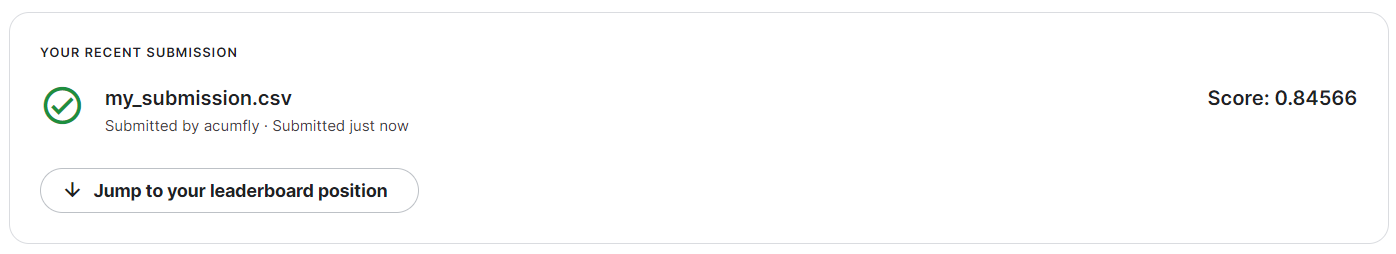